
# Práctica 2: Metaheurísticas basadas en trayectorias: Tabu Search

<center><h3>
    Raúl José Salgado García
</h3></center>


# Instrucciones

Igual que en la Práctica 1, utilizaremos un **Jupyter Notebook** para la resolución de esta práctica.

Como ya sabéis, nos permite ir ejecutando celdas de código poco a poco, así como generar automáticamente un informe bien formateado de la práctica. Aun así, a continuación tenéis unas breves instrucciones sobre como funciona:

* Puedes añadir una celda con el botón **"Insert"** de la barra de herramentas, y cambiar su tipo con **"Cell > Cell Type"**
* Para ejecutar una celda de código, la seleccionaremos y pulsaremos el botón **"▶ Run"** de la barra de herramentas.
* Para pasar el documento a HTML, seleccionaremos **"File > Download as > HTML (.html)"**

Sigue este guión hasta el final. Ejecuta el código proporcionado paso a paso comprendiendo lo que estás haciendo y reflexionando sobre los resultados. Habrá preguntas intercaladas a lo largo del guión, responde a todas ellas en la sección reservada para ese fin: **"Respuestas a los cuestionarios"**. Por favor, no modifiques ninguna linea de código excepto cuando se te pida explícitamente.

No olvides insertar tu **nombre y apellidos** en la celda superior.

IMPORTANTE: Se te pedirán dos implementaciones del algoritmo de Búsqueda Tabú, una primera implementación obligatoria y una implementación mejorada optativa. Escribe el código de tu o tus soluciones en las celdas que se indican para ello. Además, a lo largo de la práctica se plantearán varias preguntas que debéis responder en la parte inferior del documento, incluyendo las celdas que veáis necesarias (si hacéis referencia a partes concretas de vuestro código, etc) para reponder a ellas.

## Entrega de la práctica

La fecha límite de entrega será la indicada en el Campus Virtual. La entrega consistirá de un único archivo comprimido con nombre `APELIDOS_NOME_BusquedaTabu.zip` que contenga los seguientes ficheros:

 * `APELIDOS_NOME_BusquedaTabu.html`: Archivo HTML fruto de la exportación del presente Notebook, con las preguntas respondidas al final del documento.
 * `APELIDOS_NOME_BusquedaTabu.ipynb`: Archivo fuente Jupyter Notebook.
 * Archivo de datos de los problema utilizados en la resolución.
 
 ---


# Preliminares adicionales sobre Python

Además de lo visto en las prácticas anteriores, conviene familiarizarse con algunas funciones disponibles en Python que pueden resultarte útiles más adelante en la realización de esta práctica y en el uso del lenguaje en general.


Por ejemplo, cuando necesitas consultar documentación sobre paquetes Python, conviene que conozcas la versión que estás utilizando en tu entorno para poder encontrar las especificidades de cada *release*. Fíjate que en la sección *Docs by version* de la web https://docs.python.org/3/ puedes seleccionar los documentos de referencia de la versión.

Para averiguar la versión que está ejecutando este Jupyter Noteboook puedes emplear las siguientes líneas.

In [1]:
from platform import python_version

print(python_version())


3.9.7


Un paquete interesante puede ser statistics. Conociendo la versión, puedes puedes consultar la documentación y la lista completa de funciones disponibles: https://docs.python.org/3/library/statistics.html

A modo ilustrativo, puedes obtener estadísticos sobre series de datos de la siguiente forma.


In [2]:
import statistics

# ejemplo de obtención de medias y desviaciones típicas
listav = [1, 2, 3, 4, 5]
media = statistics.mean(listav)
desvtip = statistics.stdev(listav)
print(media, desvtip)

listav = [1.0, 2.5, 3.75, 4.25, 5]
media = statistics.mean(listav)
desvtip = statistics.stdev(listav)
print(media, desvtip)


3 1.5811388300841898
3.3 1.5751984002023365


Otro paquete que puede resultarte útil a la hora de crear un informe o documentar tu práctica puede ser `matplotlib.pyplot`, que permite hacer gráficas de manera integrada en el propio Notebook. Puedes consultar sus capacidades en https://matplotlib.org/stable/gallery/index.html

Veámos un ejemplo ilustrativo.

<IPython.core.display.Javascript object>


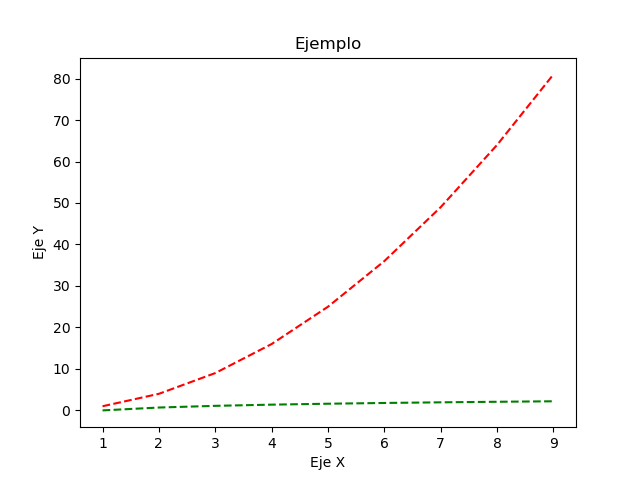

In [4]:
# Indicamos al Notebook que queremos figuras interactivas (esto sólo es necesario hacerlo una vez)
%matplotlib notebook

import matplotlib.pyplot as plt  # Importamos la librería (esto sólo es necesario hacerlo una vez)
import math

# definimos algunas líneas de tendencia arbitrarias
vectorx = [x for x in range (1,10)]
vectorlogy = [ math.log(i) for i in vectorx ]
vectorpowy = [ math.pow(i, 2) for i in vectorx ]

fig = plt.figure()  # Creamos una figura (contenedor para elementos a dibujar)
ax = fig.add_subplot(111, projection='rectilinear')  # añadimos subplot-canvas a la figura (contiene los elementos del dibujo)
 
# añadimos los plots
ax.plot(vectorx, vectorlogy, '--', color="green")
ax.plot(vectorx, vectorpowy, '--', color="red")
 
ax.set_title("Ejemplo")  # Ponemos un título
ax.set_xlabel("Eje X")  # Nombramos los ejes
ax.set_ylabel("Eje Y")
 
plt.show()  # Mostramos a figura por pantalla, que se corresponde con la fig creada arriba

---

# El Problema del Viajante de Comercio (VC) con Búsqueda Tabú

De nuevo, trataremos de resolver el problema del Viajante de Comercio, pero ahora con el algoritmo de Búsqueda Tabú.

El objetivo de esta práctica es modelar e implementar un agente inteligente que sea capaz de resolver el problema del VC mediante la metaheurística (MH) de Busquedá Tabú (TS, del inglés Tabu Search). Para ello, realizarás una implementación del algoritmo básico visto en la clase expositiva y valorarás si la introducción de modificaciones en el diseño del algoritmo te permite mejorar la calidad de las soluciones alcanzadas.


## Definición del problema de Viajante de Comercio (VC)



El problema del viajante de comercio (VC) es el problema de la persona que quiere vender un producto, y que para ello quiere encontrar el viaje más corto posible a través de las ciudades de los clientes, haciendo una única visita a cada una, empezando y acabando el recorrido en su propia ciudad (recorrido circular desde la ciudad inicial).
Típicamente, el problema parte de una representación mediante un grafo ponderado $G=(N, A)$, donde $N$ es el conjunto de $n=|N|$ nodos (ciudades), y siendo A el conjunto de arcos conectando los nodos. Cada arco $(i, j) ∈ A$ tiene asignado un peso $d_ij$ que representa la distancia entre las ciudades $i$ y $j$.
El VC se reduce al problema de crear el circuito Hamiltoniano de longitud mínima sobre el grafo $G$. La solución a una instancia del problema del VC puede representarse como una permutación de los índices de las ciudades, donde lo importante es el orden de visita, que determinará el coste del viaje en términos de la distancia recorrida total. 
De este modo, el problema pertenece a la categoría de problemas NP, pues puede haber n permutaciones que se corresponden al espacio de búsqueda posible. Esto hace que resolver instancias de problemas con muchas ciudades (n grande) haga el problema impracticable con estrategias de búsqueda no-informadas y éste pueda beneficiarse de ciertas metaheurísticas, pudiendo abordar de problemas con tallas más grande a la vez que se obtienen soluciones razonablemente buenas.


### Nociones previas

Para facilitar vuestra labor de implementación, os proporcionamos la clase `Localizaciones`, que permite cargar las localizaciones GPS que representan los vértices del grafo G de N ciudades, y permite calcular de manera transparente la distancia entre cualquier par de ciudades usando la [fórmula del semiverseno]( https://es.wikipedia.org/wiki/F%C3%B3rmula_del_semiverseno), que sirve para calcular las distancias teniendo en cuenta la curvatura de la Tierra. 
Es importante tener en cuenta que en la fórmula del semiverseno las coordenadas se expresan en radianes.


En primer lugar importa el módulo Python que acompaña esta práctica, que trae alguna función de apoyo implementada así como la clase de carga de datos.

In [3]:
from helpers_mod_sa import *

Inspecciona el código de carga de localizaciones mediante `psource(Localizaciones)`

In [ ]:
psource (Localizaciones)

Fíjate que por defecto se carga el fichero `./data/grafo8cidades.txt`, que contiene las coordenadas GPS de 8 ciudades gallegas, siendo Santiago de Compostela la primera de ellas. La primera línea de estos ficheros indica el número de ciudades n, mientras que cada una de las líneas sucesivas especifican las coordenadas de cada ciudad, especificadas como coordenadas GPS (latitud y longitud en grados).

Puedes cargar otro fichero haciendo uso del parámetro `filename` como se muestra a continuación. Si todo va bien, la primera distancia entre la ciudad 0 y 1 debe ser unos 55 km.

❗ Para esta práctica, **debéis utilizar** el fichero `./data/grafo100cidades.txt` que contiene las coordenadas de 100 concellos gallegos.

In [4]:
g1=Localizaciones(filename='./data/grafo8cidades.txt')
print (g1.distancia(0,1))
g2=Localizaciones(filename='./data/grafos10_10/grafo_1.txt')
print (g2.distancia(0,1))
g3=Localizaciones(filename='./data/grafo100cidades.txt')
print(g3.distancia(0,1))

55.88273580792048
119.30959564041359
68.81748609463234



## P2.1: Implementación básica de Búsqueda Tabú (especificación obligatoria, 6pts)



En este apartado debes desarrollar una **versión básica del algoritmo de Búsqueda Tabú que resuelva el problema del viajante de comercio (TSP)** aplicado a los concellos de Galicia. La especificación del algoritmo será muy detallada, ya que el objetivo principal de esta primera parte es que dispongas de una implementación totalmente funcional y verificada que resuelva el problema correctamente.
Igual que en la práctica anterior (P1), consideramos que el recorrido es circular (empieza y termina en el mismo concello) y que tienen que pasar por N=100 concellos de Galicia. Implementa el algoritmo básico de Búsqueda Tabú para resolver el problema del VC enunciado arriba. Para ello, revisa la descripción algorítmica de la MH vista en la clase expositiva.

Ten en cuenta las **siguientes consideraciones** de diseño para completar la implementación básica:
- **Representación  de  las  soluciones:**  representación  de  orden  (permutaciones)  **comenzando y finalizando en la ciudad 0**. Es decir, utilizamos una representación de orden formada por una secuencia de valores numéricos que representan cada uno de los concellos {0, 1, ..., 99}. Consideramos siempre como punto de partida y retorno el concello 0, por lo que efectivamente una solución *S* se representa como una permutación de los demás valores {1, ..., 99}. 


- **Solución inicial:** generación **totalmente aleatoria** de una permutación válida como está explicado en los apartados previos. 

❗  **NOTA: Es importante que la generación de la solución inicial se implemente en una función propia y que después, esta solución inicial se pase a la función que implementa el algoritmo de búsqueda tabú *per se*.**


- **Operador  de  generación de vecindario de una solución** (generación de la solución  siguiente  $S_{cand}$  a  partir  de  la  actual  $S_{act}$): Se utilizará el **operador  de  intercambio** y se generarán *todos los posibles intercambios**. Es decir, con este operador, se explota el vecindario de forma completa, con lo que se genera el siguiente número de vecinos:

$$ \sum_{i=1}^{L-1}i = \frac{L(L-1)}{2} $$

donde *L* es la longitud de la solución y se ha tenido en cuenta que es lo mismo intercambiar los vecinos *i, j* que *j, i*.

❗  **NOTA: Es importante que la generación del vecindario de una solución se implemente en una función propia y que después, el vecino seleccionado, se pase a la función que implementa el algoritmo de búsqueda tabú *per se*.**



- **Función de coste:** suma de las distancias del camino según el orden del recorrido teniendo en cuenta que se parte de y se llega al concello 0.  La distancia se calcula teniendo en cuenta los siguientes tres elementos:
    - Distancia desde el concello 0 al primer concello de la solución: 0 -> S[0]
    - Distancia recorrida en la solución: S[0] -> S[1] -> ... -> S[-1]
    - Distancia recorrida desde el concello final al concello 0: S[-1] ->0
    


- **Lista Tabú:** La lista tabú (LT) estará formada por los **movimientos de intercambio de índices** {i,j} que den lugar a las soluciones que forman la trayectoria de búsqueda. Tenéis que establecer **N=100** como parámetro de tenencia tabú, esto es, el tamaño de la lista tabú será de **N** elementos, de forma que un movimiento {i,j} saldrá de la lista tabú después de **N=100** operaciones y volverá a estar permitido.


- **Reinicialización:** En el caso de que transcurran **1000 iteraciones consecutivas** sin que mejore la solución óptima $S_{opt}$ alcanzada hasta el momento, se hará una reinicialización desde ella: $S_{opt}$. Se trata por tanto de una estrategia de reinicialización por **intensificación**. En el reinicio **no se restaura la lista tabú**, para dar opción a visitar vecinos no visitados anteriormente ya que determinados intercambios prohibidos al estar incluidos en la lista tabú. Es decir, cuando se hace un reinicio, se vuelve a la solución $S_{opt}$ y **se vacía la lista tabú.**


- **Criterio de parada:** Se finaliza la ejecución cuando se alcanzan **10.000 iteraciones** del algoritmo.



### Preguntas sobre la especificación básica obligatoria (se responde al final del notebook)

❓ **Pregunta 1**. Explica brevemente los detalles relevantes de tu código para entender tu implementación (p.ej., estructura de tu código, funciones, etc.)

❓ **Pregunta 2**. La parte experimental de la práctica consiste en realizar **10 ejecuciones diferentes** de la implementación realizada y reportar:
- **Media y desviación** estándar de la mejor solución obtenida.
- El **número de iteración** en el que se obtuvo la mejor solución (por lo que debéis mantener además de la solución óptima hasta el momento $S_{opt}$, la iteración en la que se obtiene). 
- El **tiempo de ejecución** del algoritmo (en las nociones previas se explica cómo hacer esto).

 
## P2.2: Mejoras del algoritmo de Búsqueda Tabú (especificación opcional, 4pts)
En este apartado el objetivo es aplicar la resolución del problema que acabáis de programar a un nuevo conjunto de 120 localizaciones tomadas del archivo de [50.000 lugares históricos del Registro Nacional de los EE.UU](http://www.math.uwaterloo.ca/tsp/us/data.html), tal y como se describe en la web del [Traveller Salesman Problem (TSP)](http://www.math.uwaterloo.ca/tsp/) del [Department of Combinatorics and Optimization](https://uwaterloo.ca/combinatorics-and-optimization/) de la University of Waterloo CA [(Prof. William Cook)](http://www.math.uwaterloo.ca/~bico/).
Para evitar problemas de tiempo excesivo de cómputo, reduciremos el problema a 120 localizaciones que se indican en el fichero **US120.txt**.

**NOTA:** Si alguno de vosotros quiere realizar pruebas con todos los lugares indicados, puede obtener el fichero de texto original en el [siguiente enlace](http://www.math.uwaterloo.ca/tsp/us/files/us50000_latlong.txt).


En esta sección el objetivo es realizar mejoras al algoritmo desarrollado previamente, de acuerdo a lo visto en las clases expositivas. Podrá modificarse cualquier parámetro u operador, como por ejemplo:
- **Generación de la solución inicial** (inicialización greedy, ...)
- **Gestión de la lista tabú** con la inclusión de algún criterio de aspiración (por ejemplo excluir de la lista una solución si mejora a la mejor solución hasta el momento)
- El **operador de generación de vecinos** (por ejemplo no considerar todos los pares de índices, cambiar el operador de generación, ...)
- Utilizar **otras estrategias de reinicialización** por intensificación (por ejemplo reiniciar desde una solución aleatoria de un conjunto de las N mejores soluciones hasta ahora, restaurar la lista tabú, ...).
- Cambiar la **estrategia de reinicialización para dar diversificación** con una estrategia de **memoria a largo plazo**. Como puede ser utilizar una matriz simétriza *frec* que almacene elnúmero de veces que cada par de ciudades han sido consecutivas en las soluciones aceptadas hasta el momento. Con esta matriz de frecuencias se podría realizar una inicialización voraz sobre una matriz de distancias modificada que incluya las frecuencias almacenadas en memoria y penalice los pares de ciudads con mayor frecuencia, incrementando ficticiamente su distancia:

$$ D(i,j)_{MOD} = D(i,j) + \mu (D_{MAX} - D_{min}) \frac{frec(i,j)}{frec_{MAX}} $$

- Utilizar un criterio de **oscilación estratégica** que alterne entre las estrategias de intensificación y diversificación**-

### Preguntas sobre la práctica optativa con las mejoras (se responde al final del notebook)

❓ **Pregunta 3**. ¿Qué intervenciones de mejora te ha llevado a mejores resultados? Explica brevemente las mejoras o intervenciones de mejora realizadas, cómo la has implementado, porqué las consideras buenas para el problema y presenta tus conclusiones acompañadas de los resultados obtenidos.


---

# Respuestas a las preguntas y evaluación

**Recordatorio:** No olvides escribir tu nombre y apellidos en la segunda celda de este documento.
La respuestas a las preguntas deben venir acompañadas de las implementaciones necesarias para su respuesta.

## P2.1 Especificación obligatoria (6pt)

La implementación básica se evaluará mediante un cuestionario automático de evaluación. Es también necesaria **realizar la implementación del algoritmo** y **responder a las preguntas 1 y 2** respectivamente. El cuestionario de evaluación lo realizarás en la primera sesión de la próxima práctica, y se centrará en la resolución por tu parte de diversas cuestiones prácticas relacionadas con la implementación realizada, pudiendo ser necesaria la ejecución, adaptación y modificación de la misma.

Aclaración: Independientemente del cuestionario automático de evaluación, siempre considera que las preguntas planteadas en el notebook deben ser respondidas también. Esas preguntas generales están diseñadas para formarte, y te servián para razonar y reflexionar sobre el tema, así como también para fomentar una discusión constructiva con los docentes en caso de dudas.


### **Pregunta 1** 

Explica brevemente los detalles relevantes de tu código para entender tu implementación (p.ej., estructura de tu código, funciones, etc.)

*Incluye todas las celdas que consideres oportunas para que sea legible y fácil de seguir.*

<div class="alert alert-block alert-danger">
    <b>NOTA:</b> ¿Cómo me aseguro de que mi implementación es correcta?
    
Es importante que para poder comprobar la correcta implementación de tu solución, tu código tenga en cuenta los siguientes elementos:
-  Mantener en cada iteración la mejor solución encontrada hasta el momento y la iteración en la que se encontró
-  Que puedas imprimir los elementos que se encuentran en la lista tabú
-  Saber en qué iteraciones se llevaron a cabo los reinicios
</div>

<div class="alert alert-block alert-success">
<b>NOTA:</b>  Para verificar tu implementación, debes utilizar el fichero de localizaciones de los 100 concellos gallegos (grafo100cidades.txt). Puedes utilizar como prueba para verificar que la implementaición es correcta inicialmente, el fichero de localizaciones de 8 ciudades gallegas (grafo8cidades.txt). La solución óptima resuelta con una búsqueda informada como A* se situa en torno a los 382km para el problema de prueba con 8 ciudades.
</div>
    
<div class="alert alert-block alert-success">    
<b>AYUDA EXTRA</b>: Si quieres comprobar la implementación de tu práctica puedes probar a utilizar como solución inicial la solución siguiente (pasándosela directamente a la función que implementa el algoritmo de búsqueda tabú):
    
<b> Solución inicial: </b> 
- [77, 9, 43, 73, 2, 53, 12, 83, 92, 33, 50, 63, 54, 59, 64, 74, 55, 14, 35, 5, 58, 87, 37, 7, 69, 79, 89, 21, 23, 80, 20, 56, 75, 68, 27, 95, 78, 25, 88, 51, 47, 91, 49, 60, 13, 36, 70, 42, 11, 22, 40, 72, 28, 97, 19, 71, 29, 90, 85, 76, 16, 24, 81, 84, 34, 8, 31, 38, 67, 45, 44, 32, 96, 10, 61, 94, 17, 18, 93, 30, 52, 66, 99, 26, 46, 39, 15, 86, 41, 4, 62, 1, 48, 82, 57, 98, 3, 65, 6]

Como resultados, deberías obtener los siguientes:
- <b>Mejor solución:</b> [59, 69, 75, 53, 44, 10, 87, 12, 73, 38, 94, 41, 51, 15, 9, 99, 46, 32, 17, 92, 64, 37, 55, 23, 65, 79, 20, 4, 62, 86, 11, 63, 72, 26, 14, 48, 35, 60, 83, 70, 98, 47, 43, 58, 85, 19, 40, 5, 96, 68, 45, 25, 50, 89, 74, 27, 33, 97, 7, 84, 21, 16, 67, 66, 88, 29, 95, 8, 81, 31, 30, 49, 93, 61, 1, 78, 34, 13, 2, 80, 56, 82, 6, 22, 36, 71, 18, 91, 52, 90, 54, 57, 39, 28, 76, 24, 42, 77, 3]
- <b> Coste de la solución: </b> 1663.18
- <b>Iteración en la que se encuentra la mejor solución (empezando a contar en 1):</b> 4633
    
    
    
<b>Prueba adicional con el fichero de grafo50cidadesA.txt</b>:
    
<b> Solución inicial: </b> 
- [25, 6, 43, 23, 13, 47, 4, 11, 46, 41, 15, 38, 21, 26, 14, 42, 49, 32, 33, 3, 12, 20, 8, 48, 39, 28, 37, 45, 36, 2, 17, 9, 31, 29, 7, 24, 1, 5, 18, 35, 44, 22, 16, 30, 34, 10, 40, 19, 27]

Como resultados, deberías obtener los siguientes:
- <b>Mejor solución:</b> [16, 21, 28, 23, 37, 39, 7, 2, 34, 13, 38, 27, 33, 6, 22, 20, 4, 32, 17, 46, 18, 36, 11, 26, 14, 9, 15, 41, 48, 25, 45, 35, 5, 40, 19, 47, 43, 12, 49, 1, 31, 30, 10, 44, 8, 29, 3, 42, 24]
- <b> Coste de la solución: </b> 1032.76
- <b>Iteración en la que se encuentra la mejor solución (empezando a contar en 1):</b> 4280
</div>


## Código

In [314]:
import random

# funcion de generacion de solucion inicial
def genera_solucion_inicial(mapa):
    lista = [i for i in range(1,mapa.nciudades)]
    random.shuffle(lista)
    return lista

def coste_vecino(s_act, coste_actual, vecino, intercambio, mapa):
    coste_nuevo = coste_actual
    for cambio in intercambio:
        if cambio == 0:
            coste_nuevo -= mapa.distancia(0, s_act[cambio])
            coste_nuevo -= mapa.distancia(s_act[cambio], s_act[cambio+1])

            coste_nuevo += mapa.distancia(0, vecino[cambio])
            coste_nuevo += mapa.distancia(vecino[cambio], vecino[cambio+1])
        elif cambio == len(s_act)-1:
            coste_nuevo -= mapa.distancia(s_act[cambio-1], s_act[cambio])
            coste_nuevo -= mapa.distancia(s_act[cambio], 0)

            coste_nuevo += mapa.distancia(vecino[cambio-1], vecino[cambio])
            coste_nuevo += mapa.distancia(vecino[cambio], 0)
        else:
            coste_nuevo -= mapa.distancia(s_act[cambio-1], s_act[cambio])
            coste_nuevo -= mapa.distancia(s_act[cambio], s_act[cambio+1])

            coste_nuevo += mapa.distancia(vecino[cambio-1], vecino[cambio])
            coste_nuevo += mapa.distancia(vecino[cambio], vecino[cambio+1])
                
    return coste_nuevo
            
    
    
# funcion de generacion de vencindario
def genera_vecindario(s_act, mapa, lista_tabu):
    vecindario = []
    coste_actual = funcion_coste(s_act, mapa)
    for i in range(len(s_act)):
        for j in range(i+1,len(s_act)):
            intercambio = (i,j)
            #Primero miramos si el intercambio está en la lista tabu
            if lista_tabu.existe(intercambio) == False:
                
                vecino = list(s_act)
                vecino[i], vecino[j] = vecino[j], vecino[i]

                #Aqui implementamos el cálculo del coste del vecino
                coste = coste_vecino(s_act, coste_actual, vecino, intercambio, mapa)

                vecindario.append([tuple(vecino),intercambio, coste])
    
    return vecindario
    
# funcion que implementa el algoritmo búsqueda tabú
def busqueda_tabu(MAPA, NUM_CIUDADES, N, MAX_ITS, inicial = []):
    if len(inicial)==0:
        s_in = genera_solucion_inicial(MAPA)
    else:
        s_in = inicial
    print("sin : ", s_in)
    s_mejor = s_in
    s_act = s_in
    lista_tabu = Listatabu(N) #No añadimos nada porque no se ha hecho ningun movimiento todavia
    
    its_sin_mejora = 0
    
    for i in range(MAX_ITS):
        vecinos = genera_vecindario(s_act, MAPA, lista_tabu)

        coste_act = float("inf")

        #Tomamos el vecino con menor coste
        vecino_menor_coste = min(vecinos, key=lambda elemento: elemento[2])

        
        s_act = vecino_menor_coste[0]
        
        
        movimiento_s_act = vecino_menor_coste[1]
        coste_act = vecino_menor_coste[2]
        
        
        
        
        if coste_act == float("inf"):
            #No hay soluciones mejores, no entiendo bien esto la verdad........
            print("salimos")
            break
        
        if coste_act < funcion_coste(s_mejor,MAPA):
            s_mejor = s_act
            iteracion = i
            its_sin_mejora = 0
        #Este else es para añadir la reinicializacion
        else:
            its_sin_mejora += 1
            if its_sin_mejora == 1000:
                lista_tabu, s_act = reinicializacion(N, s_mejor)
                print(lista_tabu, funcion_coste(s_act, MAPA))
                its_sin_mejora = 0
                continue
        
        lista_tabu.add(movimiento_s_act)
        
        if i % 500 == 0:
            print(funcion_coste(s_mejor, MAPA), i)
        
    return (s_mejor, iteracion)

def reinicializacion(N, s_mejor):
    return (Listatabu(N), s_mejor)


def funcion_coste(s, mapa):
    cost_tot = 0
    cost_tot += mapa.distancia(0,s[0])
    for i in range(len(s)-1):
        cost_tot += mapa.distancia(s[i], s[i+1])
    cost_tot += mapa.distancia(s[len(s)-1], 0)
    return cost_tot


def diferencia_coste(s_act, s_cand, mapa):
    return funcion_coste(s_act, mapa) - funcion_coste(s_cand, mapa)



In [315]:
#La lista tabú será un set con un máximo número de elementos
class Listatabu:
    def __init__(self, max_items):
        self.max_items = max_items
        self.elementos = []
        self.num_elems = len(self.elementos)
        
    def add(self, elemento):
        if self.num_elems == self.max_items:
            self.elementos.pop(0)
            self.elementos.append(elemento)
        else:
            self.elementos.append(elemento)
            self.num_elems += 1
            
    def existe(self, elemento):
        if elemento in self.elementos:
            return True
        else:
            return False
        
    def __str__(self):
        return str(self.elementos)
        

In [8]:
#Primera prueba de funcionamiento
g3=Localizaciones(filename='./data/grafo100cidades.txt')
g1=Localizaciones(filename='./data/grafo8cidades.txt')
busqueda_tabu(g1, 8, 8, 10000)

sin :  [2, 1, 4, 7, 6, 3, 5]
574.9248805633788 0
501.2402797212533 1
476.2548964584804 2
399.13723055374794 3
381.6699617675482 4
[] 381.6699617675482
[] 381.6699617675482
[] 381.6699617675482
[] 381.6699617675482
[] 381.6699617675482
[] 381.6699617675482
[] 381.6699617675482
[] 381.6699617675482
[] 381.6699617675482


((1, 2, 3, 4, 5, 6, 7), 4)

In [34]:
#Probamos que la implementación es correcta como indica en el cuadro verde
inicial = [77, 9, 43, 73, 2, 53, 12, 83, 92, 33, 50, 63, 54, 59, 64, 74, 55, 14, 35, 5, 58, 87, 37, 7, 69, 79, 89, 21, 23, 80, 20, 56, 75, 68, 27, 95, 78, 25, 88, 51, 47, 91, 49, 60, 13, 36, 70, 42, 11, 22, 40, 72, 28, 97, 19, 71, 29, 90, 85, 76, 16, 24, 81, 84, 34, 8, 31, 38, 67, 45, 44, 32, 96, 10, 61, 94, 17, 18, 93, 30, 52, 66, 99, 26, 46, 39, 15, 86, 41, 4, 62, 1, 48, 82, 57, 98, 3, 65, 6]
g3=Localizaciones(filename='./data/grafo100cidades.txt')
sol = busqueda_tabu(g3, 100, 100, 10000, inicial)
print(sol[0], sol[1])
print("coste", funcion_coste(sol[0], g3))

sin :  [77, 9, 43, 73, 2, 53, 12, 83, 92, 33, 50, 63, 54, 59, 64, 74, 55, 14, 35, 5, 58, 87, 37, 7, 69, 79, 89, 21, 23, 80, 20, 56, 75, 68, 27, 95, 78, 25, 88, 51, 47, 91, 49, 60, 13, 36, 70, 42, 11, 22, 40, 72, 28, 97, 19, 71, 29, 90, 85, 76, 16, 24, 81, 84, 34, 8, 31, 38, 67, 45, 44, 32, 96, 10, 61, 94, 17, 18, 93, 30, 52, 66, 99, 26, 46, 39, 15, 86, 41, 4, 62, 1, 48, 82, 57, 98, 3, 65, 6]
8294.671201829853 0
7916.395842963709 1
7566.77657768916 2
7263.681215409916 3
6962.079603271616 4
6660.912115816683 5
6385.885741044173 6
6117.770156400264 7
5865.134148862049 8
5659.742758733489 9
5463.505448844538 10
5287.475547953465 11
5128.702988696754 12
4971.531148961278 13
4824.747014748516 14
4700.770048326151 15
4587.318641707304 16
4483.945870744868 17
4385.190190401491 18
4294.790398842664 19
4229.019402986686 20
4120.016193198027 21
4054.05506612966 22
3983.012552483363 23
3929.8856160771306 24
3871.994638564865 25
3803.8590681339106 26
3751.7761973558495 27
3703.5647102229013 28
3656

In [49]:
#Probamos que la implementación es correcta como indica en el cuadro verde
inicial = [25, 6, 43, 23, 13, 47, 4, 11, 46, 41, 15, 38, 21, 26, 14, 42, 49, 32, 33, 3, 12, 20, 8, 48, 39, 28, 37, 45, 36, 2, 17, 9, 31, 29, 7, 24, 1, 5, 18, 35, 44, 22, 16, 30, 34, 10, 40, 19, 27]
g4=Localizaciones(filename='./data/grafo50cidadesA.txt')
sol = busqueda_tabu(g4, 50, 100, 10000, inicial)
print(sol[0], sol[1])
print("coste", funcion_coste(sol[0], g4))

sin :  [25, 6, 43, 23, 13, 47, 4, 11, 46, 41, 15, 38, 21, 26, 14, 42, 49, 32, 33, 3, 12, 20, 8, 48, 39, 28, 37, 45, 36, 2, 17, 9, 31, 29, 7, 24, 1, 5, 18, 35, 44, 22, 16, 30, 34, 10, 40, 19, 27]
4054.49390104184 0
3777.1076260840373 1
3536.6776030773285 2
3324.2486678871355 3
3127.8776539147616 4
2961.5548252177073 5
2798.6893350455744 6
2666.9388454322366 7
2579.785811723678 8
2504.493518114751 9
2428.1545392854946 10
2382.683577938658 11
2328.909908256608 12
2283.7842682074725 13
2228.3451858759367 14
2185.111074213034 15
2138.105647084397 16
2095.270684517312 17
2068.192040537197 18
2042.2133627957508 19
2010.8063345714875 20
1977.169929742249 21
1937.6816713259311 22
1914.2520668583456 23
1887.7781020880764 24
1834.9034602314923 25
1761.3471762535942 26
1737.1155158848792 27
1716.8907603959028 28
1698.4010742359173 29
1673.7243998929127 30
1660.7344112436176 31
1650.8850670348825 32
1602.8815619801476 33
1560.996213599206 34
1547.1221905245347 35
1526.7000519757275 36
1496.79572816

###  **Pregunta 2**

La parte experimental de la práctica consiste en realizar **10 ejecuciones diferentes** de la implementación realizada y reportar:
- **Media y desviación** estándar de las soluciones obtenidas.
- El **número de iteración** en el que se obtuvo la mejor solución (por lo que debéis mantener además de la solución óptima hasta el momento $S_{opt}$, la iteración en la que se obtiene). 
- El **tiempo de ejecución** del algoritmo (en las nociones previas se explica cómo hacer esto).

*Incluye todas las celdas que consideres oportunas para que sea legible y fácil de seguir.*


In [ ]:
import time
import numpy as np
g3=Localizaciones(filename='./data/grafo100cidades.txt') 
soluciones = []
costes = []
iteracion = []
tiempos = []
for i in range(10):
    inicial = time.time()
    sol = busqueda_tabu(g3, 100, 100, 10000)
    final = time.time()
    print("Tiempo iteracion: ", final-inicial)
    soluciones.append(sol[0])
    costes.append(funcion_coste(sol[0],g3))
    iteracion.append(sol[1])
    tiempos.append(final - inicial)
    
np.save('soluciones_pruebas.npy', np.array(soluciones))
np.save('costes_pruebas.npy', np.array(costes))
np.save('iteracion_pruebas.npy', np.array(iteracion))
np.save('tiempos_pruebas.npy', np.array(tiempos))

In [12]:
import statistics
tiempos = np.load("tiempos.npy")
costes = np.load("costes.npy")
iteracion = np.load("iteracion.npy")

print("Media de costes: ", statistics.mean(costes))
print("Desviacion: ", statistics.stdev(costes))
print("Minimo: ", min(costes))
print("Maximo: ", max(costes))
print("Media de tiempos: ", statistics.mean(tiempos))
print("Desviacion: ", statistics.stdev(tiempos))
print("Tiempo de la mejor solucion: ", tiempos[list(costes).index(min(costes))])
print("Media de iteracion: ", statistics.mean(iteracion))
print("Desviacion: ", statistics.stdev(iteracion))
print("Iteracion de la mejor solucion: ", iteracion[list(costes).index(min(costes))])

Media de costes:  1686.5762513545278
Desviacion:  63.60686811966013
Minimo:  1595.1355870309062
Maximo:  1815.8054148038132
Media de tiempos:  241.25566024780272
Desviacion:  4.031094443995748
Tiempo de la mejor solucion:  236.57311344146729
Media de iteracion:  4653
Desviacion:  2300.2899817196962
Iteracion de la mejor solucion:  9877


❗  **NOTA: sé conservador en tu estrategia para verificar tu implementación**, especialmente cuando empleas ficheros de datos grandes como el del problema de las 100 ciudades. Si dejas ejecutando tu algoritmo por un número elevado de iteraciones, puede resultarte útil medir el tiempo que tarda para tomar decisiones sobre donde establecer el límite. 

## P2.2 Implementación de las mejoras (4 pt)

### **Pregunta 3** 

¿Qué intervenciones de mejora te ha llevado a mejores resultados? Prepara un informe en el que explices brevemente las mejoras o intervenciones de mejora realizadas, cómo las has implementado, y diseña un laboratorio para obtener resultados que te permitan explicar porqué las consideras buenas para el problema y soportar tus conclusiones acompañadas de los resultados obtenidos. (MAX. aprox. 1200 palabras)

Aclaraciones: La evaluación de esta parte se llevará a cabo en términos de la completitud y correctitud del laboratorio implementado, así como de la calidad del propio informe, que debe ser conciso y preciso, pudiendo acompañarse de gráficas y tablas que faciliten y fundamenten la explicación e argumentación. Es muy importante explicar de manera clara, precisa y fundamentada. Se valorará más positivamente las intervenciones de mejora que tengan mayor dificultad de implementación que las triviales. Se reservará hasta un punto que se asignará en términos de la calidad de la mejor solución obtenida entre el conjunto de las prácticas entregadas (es por ello que no debes olvidar marcar en tu informe muy claramente cuál ha sido tu mejor solución y con qué configuración/versión).

*Incluye todas las celdas que consideres oportunas para que sea legible y fácil de seguir*

<h1> INFORME </h1>

En la primera parte de la práctica se desarrollo el algoritmo de Búsqueda Tabú desde creo. En esta segunda parte, el objetivo es mejorar el algoritmo para obtener soluciones más eficiente y reducir el tiempo de ejecución (que es crítico por el coste del algoritmo). Solo podremos realizar 3 ejecuciones de las versiones básica y final y una siempre con la misma solución inicial de cada mejora por separado, para ver como funcionan. 

Los resultados obtenidos en la ejecución básica son:

|  | 3 veces | 1 vez misma solución |
|-----------|-----------|-----------|
| **Media costes**   | 33157.258    | 30329.548    |
| **Desviacion**   | 2582.655    |     |
| **Tiempo medio por iteracion**    | 392.544 s    | 401.495 s    |
| **Optima**    | 30329.548   | 30329.548   |
| **Encontrada**    | 3106   | 3106   |

La solución más óptima se encuentra en la iteración 3106, lo que significa que el 70% del tiempo que el algoritmo se ejecuta es tiempo del que no se obtiene ningún resultado.

Las **primeras mejoras** que implementaremos pretender mejorar los tiempos de ejecución del algoritmo, que son actualmente de cerca de 7 minutos. Las primera de las dos mejoras que implementaremos con este fin consiste en modificar el funcionamiento de la lista tabú para que en vez de emplear simplemente una lista donde almacena los intercambios prohibidos, utilice una estructura set (además de la lista para mantener el orden de entrada) en la que la búsqueda de un elemento por su valor es mucho más rápida que recorriendo la lista con un bucle. La segunda mejora consistirá en partir la función de generación de vecindario en dos. En la primera parte generaremos a todos los vecinos de la solución actual y en la segunda calcularemos el coste de los vecinos una vez tengamos la lista entera. Los resultados obtenidos con dichas mejoras son los siguientes:

|  | Basica (1 vez) | Utilizando set | Generacion vecindario partida |
|-----------|-----------|-----------|--|
| **Tiempo**    | 401.495 s    | 298.380 s    | 384.488 s  |

La búsqueda en la tabla tabú suponía gran parte del coste temporal del algoritmo, teniendo que recorrer esta continuamente. La posibilidad de buscar un elemento en un set directamente identado por su valor resulta muy favorecedor. La generación del vecindario en dos partes a priori no tiene mucho sentido que mejore el tiempo de ejecución, ya que incluye más bucles en su código. Sin embargo, puede que por cuestiones relacionadas con la capacidad de la caché y la memoria principal la localidad de los datos sea mejor aprovechada en esta segunda versión. Esto podría explicar la mejora.

En el resto de versiones del código utilizaremos estas dos mejoras para poder realizar los experimentos en menor tiempo. 

Las siguientes mejoras ya pretenden obtener soluciones más óptimas. No son muchas las mejoras que han derivado en un beneficio al final.  Han sido muchas las soluciones que han dado resultados mínimamente mejores, pero que han aumentado mucho el número de iteraciones en que se encuentra la mejor solución. Comentaremos todos ellos rápidamente utilizando la siguiente tabla:


|  | Básica | Aspiracion | Insercion | Memoria corto plazo |
|-----------|-----------|-----------|-----------|-----------|
| **Optima**   | 30329.548    | 29250.389    |    31846.470 | 29126.151   | 
| **Tiempo**    | 401.495 s    | 325.982    |     |  330.593   |  
| **Iteracion**    | 3106   | 9105   |   1768 | 9984   | 

La primera mejora que no ha resultado muy beneficiosa consiste en incluir un criterio de aspiración a la lista tabú. Esto quiere decir, que ciertas soluciones se excluyen de la lista tabú por considerarse que pueden ser muy beneficiosas. En este caso, se ha excluido de la lista a aquellas soluciones que eran mejores que la óptima hasta ese momento. Esto, no ha aportado ningún beneficio, solo ha resultado en una repetitiva vuelta a soluciones ya visitadas, provocando que se encuentre una solución ciertamente muy similar en 2 veces más iteraciones. La mejora de inserción se basaba en la idea de que sería menos radical en una solución intermedia introducir un elemento en una posición diferente que no intercambiar dos elementos entre ellos.  Sin embargo, ocurre que no se adapta bien al algoritmo, y este no consigue profundizar adecuadamente en zonas correctas, quedándose con una solución óptima incluso por debajo de la versión básica. Finalmente, la mejora de memoria a corto plazo utiliza una pila donde se almacenan las N mejores soluciones hasta ese momento. Cuando llega el momento de reinicializar se toma como solución actual la primera obtenida de la pila. Así, no solo volvemos a la mejor solución encontrada, sino también a buenas soluciones anteriores, pretendiendo no dejar atrás otras soluciones diferentes que podrían ser mejores, una vez observamos que no podemos aprovechar más la intensificación de la solución mejor (que será la primera en tomarse de la pila). Esto, como el resto, no ha resultado especialmente bien, mejorando poco la solución óptima y requiriendo muchas más iteraciones.

Ahora vamos con las modificaciones que sí han mejorado sustancialmente el rendimiento del algoritmo. La primera de ellas consiste en utilizar un algoritmo voraz en la solución inicial del algoritmo. Con esto, buscamos acotar desde un principio la búsqueda en torno a una solución bastante buena, viendo si así, a través de la intensificación, se puede llegar a una solución mejor. Este algoritmo voraz o greedy pondrá a continuación de la última ciudad en la solución, la ciudad cuya distancia con la anterior sea menor. Los resultados son los siguientes:


|  | Coste solucion inicial | Optima | Tiempo | Iteracion |
|-----------|-----------|-----------|--|--|
| **Greedy**    |   27033.850  | 25619.983    | 318.460 s  | 2385  |

Efectivamente consigue lo que se proponía. Parte de una solución muy buena, de 27000, a partir de la cual consigue cierta mejora en un número de iteraciones muy pequeño. El tiempo útil es muy bajo y se consigue una solución muy buena. La mejor hasta el momento. 

La siguiente mejora consiste en implementar una estrategia diferente de reinicialización llamada diversificación. Esta pretende favorecer a la exploración del espacio de búsqueda reinicializando la solución actual en una que esté en una zona del espacio de búsqueda poco visitada. Para ello, guardaremos una matriz de frecuencias donde para cada par (i,j) donde j es la ciudad siguiente a i, se guarda la cantidad de veces que se ha dado esa situación. Cuando se haga la reinicialización se utilizará el mismo procedimiento greedy que para la solución inicial pero añadiendo al coste de la ciudad i a la ciudad j una cantidad según el valor de Mu y su frecuencia. Así, accederemos a nuevas zonas del espacio no exploradas, pero manteniendo soluciones buenas y coherentes, como ya teníamos en greedy. 

Para poder combinar exploración y explotación utilizaremos la oscilación estratégica, que alternará aleatoriamente entre intensificación y diversificación. 

 Obtenemos los siguientes resultados:

|  | Básica | Diversificacion | Oscilación estratégica u=0.3 sin_mejora=1000| Oscilación estratégica u=0.05 sin_mejora=500
|-----------|-----------|-----------|-----------|--|
| **Optima**   | 30329.548    | 26036.182    |    25061.940 | 25690.302   | 
| **Tiempo**    | 401.495 s    | 332.921    |   331.019  |  338.190   |  
| **Iteracion**    | 3106   | 7792   |   7792 | 7768   | 

Con la oscilación estamos introduciendo un componente aleatorio en nuestro algoritmo, lo que hará que la salida del mismo no sea siempre la misma, aún para la misma solución inicial, lo que dificulta la comparación. Por eso es que la diferencia entre diversificación y oscilación estratégica no se aprecia mucho. Tampoco se aprecia cuando jugamos con los parámetros Mu, que determina cuanta importancia tendrá la frecuencia en el cálculo del coste, y la cantidad de iteraciones sin mejora que tienen que pasar para reinicializar. Tras muchas pruebas y por intuición, hemos determinado que los mejores valores de estos parámetros son Mu=0.05 y sin_mejora=500. El valor de Mu se reduce para que los costes de las soluciones con las que se reinicializa disminuyan y sean de alrededor de 30000, un valor intermedio en el rango de soluciones que obtenemos. El número de iteraciones sin mejora antes de reinicializar se disminuye también buscando que se hagan más reinicializaciones, y por tanto más intensificación y diversificación. Si nos excedemos con este valor no le da tiempo al algoritmo ha explotar correctamente el espacio y podemos no obtener buenas soluciones. La oscilación consigue ese balanceo que se busca entre explotar y explorar, dando, como veremos ahora, las mejores soluciones.

 Utilizando greedy con oscilación se obtienen unos resultados muy similares a utilizar solo oscilación, que será la versión final de nuestro código. Esto depende del componente aleatorio. En comparación con la versión básica ejecutándola 3 veces:


|  | 3 veces | Oscilacion u=0.05 y sin_mejora=500 |
|-----------|-----------|-----------|
| **Media costes**   | 33157.258    | 24303.210    |
| **Desviacion**   | 2582.655    |  209.90   |
| **Tiempo medio por iteracion**    | 392.544 s    | 323.743 s   |
| **Optima**    | 30329.548   | 24102.322   |
| **Encontrada**    | 3106   | 6358   |

La versión mejorada supera a todos los niveles a la básica. Quizás si se pretendiese la máxima eficiencia temporal lo mejor sería utilizar la versión greedy, que consigue en 1000 iteraciones menos que la básica encontrar una solución mejor. De todas formas, teniendo en cuenta que el algoritmo de Búsqueda Tabú es un algoritmo costoso, creo que la mejor decisión es decantarse por una solución con más tiempo de ejecución, pero también que asegure los mejores resultados posibles; y esa es la que utiliza oscilación con los parámetros mencionados antes. 

Ejecutaremos 10 veces esta mejor solución para ver cual es la solución más óptima que conseguimos

<h3> Se obtiene la mejor solución utilizando "Oscilacion u=0.05 y sin_mejora=500". </h3>
<h3>Esta solución tiene un coste de 23343.592 y se encuentra en la iteracion 9938. 
    <h3>La solución es: </h3>
<h3>[101, 79, 51, 91, 81, 109, 119, 83, 69, 82, 89, 8, 38, 40, 105, 36, 35, 94, 18, 16, 59, 4, 42, 71, 110, 113, 14, 11, 58, 55, 21, 62, 75, 63, 41, 24, 26, 23, 52, 117, 92, 34, 60, 47, 9, 20, 111, 49, 25, 17, 103, 96, 70, 73, 88, 31, 72, 5, 87, 112, 54, 95, 85, 104, 46, 33, 108, 48, 97, 57, 6, 45, 30, 44, 102, 76, 39, 29, 116, 118, 15, 67, 12, 115, 106, 1, 61, 98, 99, 56, 19, 7, 27, 86, 65, 93, 28, 66, 3, 53, 50, 64, 74, 37, 84, 2, 13, 78, 80, 114, 107, 22, 68, 100, 90, 43, 32, 10, 77]</h3>




<h2> Pruebas básicas </h2>

In [24]:
#PRUEBAS DE LA VERSIÓN BÁSICA CON MAPA DE 120 CIUDADES. 3 repeticiones
import time
import numpy as np
g5=Localizaciones(filename='./data/US120.txt') 
soluciones = []
costes = []
iteracion = []
tiempos = []
for i in range(3):
    inicial = time.time()
    sol = busqueda_tabu(g5, 120, 100, 10000)
    final = time.time()
    print("Tiempo iteracion: ", final-inicial)
    soluciones.append(sol[0])
    costes.append(funcion_coste(sol[0],g5))
    iteracion.append(sol[1])
    tiempos.append(final - inicial)
    
np.save('soluciones_basica.npy', np.array(soluciones))
np.save('costes_basica.npy', np.array(costes))
np.save('iteracion_basica.npy', np.array(iteracion))
np.save('tiempos_basica.npy', np.array(tiempos))

sin :  [116, 94, 113, 59, 109, 38, 57, 64, 68, 15, 13, 87, 53, 66, 35, 89, 60, 21, 102, 95, 69, 31, 80, 90, 118, 85, 40, 28, 88, 25, 3, 16, 10, 75, 73, 51, 71, 58, 104, 46, 9, 39, 1, 18, 6, 63, 100, 117, 32, 37, 106, 70, 33, 110, 74, 76, 82, 81, 14, 84, 48, 41, 34, 29, 56, 20, 78, 22, 12, 115, 54, 93, 83, 8, 61, 105, 101, 77, 11, 86, 103, 42, 4, 79, 45, 99, 5, 62, 72, 55, 112, 65, 23, 30, 52, 97, 36, 17, 91, 98, 7, 92, 49, 47, 27, 119, 50, 44, 67, 19, 26, 107, 2, 111, 108, 114, 43, 24, 96]
178324.705672494 0
35670.77386265365 500
35063.95784741774 1000
34042.567189425405 1500
34042.567189425405 2000
33922.90206866632 2500
33922.90206866632 3000
[] 33922.90206866632
33750.65656737128 3500
33750.65656737128 4000
[] 33750.65656737128
33750.65656737128 4500
33750.65656737128 5000
[] 33750.65656737128
33750.65656737128 5500
33750.65656737128 6000
[] 33750.65656737128
33750.65656737128 6500
33750.65656737128 7000
[] 33750.65656737128
33750.65656737128 7500
33750.65656737128 8000
[] 33750.656

In [25]:
import statistics
tiempos = np.load("tiempos_basica.npy")
costes = np.load("costes_basica.npy")
iteracion = np.load("iteracion_basica.npy")

print("Media de costes: ", statistics.mean(costes))
print("Desviacion: ", statistics.stdev(costes))
print("Minimo: ", min(costes))
print("Maximo: ", max(costes))
print("Media de tiempos: ", statistics.mean(tiempos))
print("Desviacion: ", statistics.stdev(tiempos))
print("Tiempo de la mejor solucion: ", tiempos[list(costes).index(min(costes))])
print("Media de iteracion: ", statistics.mean(iteracion))
print("Desviacion: ", statistics.stdev(iteracion))
print("Iteracion de la mejor solucion: ", iteracion[list(costes).index(min(costes))])

Media de costes:  33157.25801621685
Desviacion:  2582.6549507471045
Minimo:  30329.548030619946
Maximo:  35391.569450659335
Media de tiempos:  392.5435201327006
Desviacion:  4.352552552691559
Tiempo de la mejor solucion:  388.30961418151855
Media de iteracion:  3383
Desviacion:  517.4640084102468
Iteracion de la mejor solucion:  3106


In [11]:
#PRUEBA CON UNA SOLUCIÓN INICIAL FIJA Y LA VERSION BÁSICA
inicial = [92, 114, 19, 103, 96, 94, 34, 112, 51, 82, 104, 80, 38, 9, 71, 72, 6, 7, 45, 57, 79, 3, 1, 50, 113, 16, 44, 43, 108, 42, 32, 95, 77, 74, 48, 84, 18, 30, 60, 87, 31, 116, 35, 118, 61, 86, 41, 56, 89, 106, 76, 90, 4, 117, 55, 78, 39, 63, 8, 99, 52, 46, 5, 67, 33, 21, 93, 20, 65, 2, 36, 28, 81, 62, 11, 110, 59, 40, 54, 91, 29, 100, 49, 111, 70, 14, 85, 101, 88, 17, 64, 107, 119, 73, 69, 66, 27, 102, 10, 25, 47, 23, 75, 98, 97, 15, 109, 68, 83, 37, 115, 24, 105, 26, 13, 53, 58, 12, 22]
g5=Localizaciones(filename='./data/US120.txt')
inicio = time.time()
sol = busqueda_tabu(g5, 120, 100, 10000, inicial)
fin = time.time()
print("Tiempo que ha tardado: ", fin-inicio)
print(sol[0], sol[1])
print("coste", funcion_coste(sol[0], g5))

sin :  [92, 114, 19, 103, 96, 94, 34, 112, 51, 82, 104, 80, 38, 9, 71, 72, 6, 7, 45, 57, 79, 3, 1, 50, 113, 16, 44, 43, 108, 42, 32, 95, 77, 74, 48, 84, 18, 30, 60, 87, 31, 116, 35, 118, 61, 86, 41, 56, 89, 106, 76, 90, 4, 117, 55, 78, 39, 63, 8, 99, 52, 46, 5, 67, 33, 21, 93, 20, 65, 2, 36, 28, 81, 62, 11, 110, 59, 40, 54, 91, 29, 100, 49, 111, 70, 14, 85, 101, 88, 17, 64, 107, 119, 73, 69, 66, 27, 102, 10, 25, 47, 23, 75, 98, 97, 15, 109, 68, 83, 37, 115, 24, 105, 26, 13, 53, 58, 12, 22]
179952.61643276052 0
35064.48878513802 500
33652.78560918093 1000
32552.168272584076 1500
31875.576217239708 2000
31038.203114984102 2500
31038.203114984102 3000
[] 31038.203114984102
30329.548030619946 3500
30329.548030619946 4000
[] 30329.548030619946
30329.548030619946 4500
30329.548030619946 5000
[] 30329.548030619946
30329.548030619946 5500
30329.548030619946 6000
[] 30329.548030619946
30329.548030619946 6500
30329.548030619946 7000
[] 30329.548030619946
30329.548030619946 7500
30329.54803061994

<h2> Mejoras Temporales </h2>

<h3> Utilizar un diccionario en la lista tabú, además de una lista para conocer el orden </h3>

In [316]:
#La primera mejora es que la lista tabú utilice una lista y un diccionario, al mismo tiempo, para conseguir que la búsqueda sea más rapida. 
#La lista tabú será un set con un máximo número de elementos
class Listatabu:
    def __init__(self, max_items):
        self.max_items = max_items
        self.elementos_lista = []
        self.num_elems = len(self.elementos_lista)
        self.elementos_set = set()
        
    def add(self, elemento):
        if self.num_elems == self.max_items:
            eliminado = self.elementos_lista.pop(0)
            self.elementos_lista.append(elemento)
            self.elementos_set.remove(eliminado)
            self.elementos_set.add(elemento)
        else:
            self.elementos_lista.append(elemento)
            self.elementos_set.add(elemento)
            self.num_elems += 1
            
    def existe(self, elemento):
        if elemento in self.elementos_set:
            return True
        else:
            return False
        
    def __str__(self):
        return str(self.elementos_lista)

In [13]:
#PRUEBA DE LA MEJORA DE TIEMPO CON DICCIONARIO. SOLO CON UNA SOLUCIÓN INICIAL FIJA
inicial = [92, 114, 19, 103, 96, 94, 34, 112, 51, 82, 104, 80, 38, 9, 71, 72, 6, 7, 45, 57, 79, 3, 1, 50, 113, 16, 44, 43, 108, 42, 32, 95, 77, 74, 48, 84, 18, 30, 60, 87, 31, 116, 35, 118, 61, 86, 41, 56, 89, 106, 76, 90, 4, 117, 55, 78, 39, 63, 8, 99, 52, 46, 5, 67, 33, 21, 93, 20, 65, 2, 36, 28, 81, 62, 11, 110, 59, 40, 54, 91, 29, 100, 49, 111, 70, 14, 85, 101, 88, 17, 64, 107, 119, 73, 69, 66, 27, 102, 10, 25, 47, 23, 75, 98, 97, 15, 109, 68, 83, 37, 115, 24, 105, 26, 13, 53, 58, 12, 22]
g5=Localizaciones(filename='./data/US120.txt')
inicio = time.time()
sol = busqueda_tabu(g5, 120, 100, 10000, inicial)
fin = time.time()
print("Tiempo que ha tardado: ", fin-inicio)
print(sol[0], sol[1])
print("coste", funcion_coste(sol[0], g5))

sin :  [92, 114, 19, 103, 96, 94, 34, 112, 51, 82, 104, 80, 38, 9, 71, 72, 6, 7, 45, 57, 79, 3, 1, 50, 113, 16, 44, 43, 108, 42, 32, 95, 77, 74, 48, 84, 18, 30, 60, 87, 31, 116, 35, 118, 61, 86, 41, 56, 89, 106, 76, 90, 4, 117, 55, 78, 39, 63, 8, 99, 52, 46, 5, 67, 33, 21, 93, 20, 65, 2, 36, 28, 81, 62, 11, 110, 59, 40, 54, 91, 29, 100, 49, 111, 70, 14, 85, 101, 88, 17, 64, 107, 119, 73, 69, 66, 27, 102, 10, 25, 47, 23, 75, 98, 97, 15, 109, 68, 83, 37, 115, 24, 105, 26, 13, 53, 58, 12, 22]
179952.61643276052 0
35064.48878513802 500
33652.78560918093 1000
32552.168272584076 1500
31875.576217239708 2000
31038.203114984102 2500
31038.203114984102 3000
[] 31038.203114984102
30329.548030619946 3500
30329.548030619946 4000
[] 30329.548030619946
30329.548030619946 4500
30329.548030619946 5000
[] 30329.548030619946
30329.548030619946 5500
30329.548030619946 6000
[] 30329.548030619946
30329.548030619946 6500
30329.548030619946 7000
[] 30329.548030619946
30329.548030619946 7500
30329.54803061994

<h3> Primero generar el vecindario y después calcular el coste de los vecinos, no todo en el mismo bucle </h3>

In [317]:
#LO SIGUIENTE QUE PROBAMOS PARA MEJORAR EL TIEMPO ES PRIMERO GENERAR EL VECINDARIO Y LUEGO CALCULAR LOS COSTES
def busqueda_tabu(MAPA, NUM_CIUDADES, N, MAX_ITS, inicial = []):
    #print(MAPA, NUM_CIUDADES, N, MAX_ITS)
    if len(inicial)==0:
        s_in = genera_solucion_inicial(MAPA)
    else:
        s_in = inicial
    print("sin : ", s_in)
    s_mejor = s_in
    s_act = s_in
    lista_tabu = Listatabu(N) #No añadimos nada porque no se ha hecho ningun movimiento todavia
    
    its_sin_mejora = 0
    
    for i in range(MAX_ITS):
        vecinos = genera_vecindario(s_act)
        #Ahora calcularemos el coste de todos los vecinos y lo haremos parte de la tupla (vecino, movimiento, coste)
        vecinos = coste_vecinos(s_act, vecinos, MAPA)
        coste_act = float("inf")
        for vecino in vecinos:
            #print(vecino)

            if lista_tabu.existe(vecino[1]) == False and vecino[2] < coste_act:
                s_act = vecino[0]
                movimiento_s_act = vecino[1]
                coste_act = vecino[2] 
        if coste_act == float("inf"):
            #No hay soluciones mejores, no entiendo bien esto la verdad........
            print("salimos")
            break
        if coste_act < funcion_coste(s_mejor, MAPA):
            s_mejor = s_act
            iteracion = i
            its_sin_mejora = 0
        #Este else es para añadir la reinicializacion
        else:
            its_sin_mejora += 1
            if its_sin_mejora == 1000:
                lista_tabu, s_act = reinicializacion(N, s_mejor)
                print(lista_tabu, funcion_coste(s_act, MAPA))
                its_sin_mejora = 0
                continue
            
        
        lista_tabu.add(movimiento_s_act)
        
        if i % 500 == 0:
            print(funcion_coste(s_mejor, MAPA), i)
        
    return (s_mejor, iteracion)

def coste_vecinos(s_act, vecinos, mapa):
    coste_actual = funcion_coste(s_act, mapa)
    for vecino in vecinos:
        coste_nuevo = coste_actual
        for intercambio in vecino[1]:
            if intercambio == 0:
                coste_nuevo -= mapa.distancia(0, s_act[intercambio])
                coste_nuevo -= mapa.distancia(s_act[intercambio], s_act[intercambio+1])
                
                coste_nuevo += mapa.distancia(0, vecino[0][intercambio])
                coste_nuevo += mapa.distancia(vecino[0][intercambio], vecino[0][intercambio+1])
            elif intercambio == len(s_act)-1:
                coste_nuevo -= mapa.distancia(s_act[intercambio-1], s_act[intercambio])
                coste_nuevo -= mapa.distancia(s_act[intercambio], 0)
                
                coste_nuevo += mapa.distancia(vecino[0][intercambio-1], vecino[0][intercambio])
                coste_nuevo += mapa.distancia(vecino[0][intercambio], 0)
            else:
                coste_nuevo -= mapa.distancia(s_act[intercambio-1], s_act[intercambio])
                coste_nuevo -= mapa.distancia(s_act[intercambio], s_act[intercambio+1])
                
                coste_nuevo += mapa.distancia(vecino[0][intercambio-1], vecino[0][intercambio])
                coste_nuevo += mapa.distancia(vecino[0][intercambio], vecino[0][intercambio+1])
                
        vecino.append(coste_nuevo)
    
    return vecinos

# funcion de generacion de vencindario
def genera_vecindario(s_act):
    vecindario = []
    for i in range(len(s_act)):
        for j in range(i+1,len(s_act)):
            vecino = list(s_act)
            vecino[i], vecino[j] = vecino[j], vecino[i]
            vecindario.append([tuple(vecino),(i,j)])
    
    return vecindario

In [20]:
#PRUEBA DE LA MEJORA DE TIEMPO CON SEPARACION DE GENERACION DE VECINOS Y SUS COSTES. SOLO CON UNA SOLUCIÓN INICIAL FIJA
inicial = [92, 114, 19, 103, 96, 94, 34, 112, 51, 82, 104, 80, 38, 9, 71, 72, 6, 7, 45, 57, 79, 3, 1, 50, 113, 16, 44, 43, 108, 42, 32, 95, 77, 74, 48, 84, 18, 30, 60, 87, 31, 116, 35, 118, 61, 86, 41, 56, 89, 106, 76, 90, 4, 117, 55, 78, 39, 63, 8, 99, 52, 46, 5, 67, 33, 21, 93, 20, 65, 2, 36, 28, 81, 62, 11, 110, 59, 40, 54, 91, 29, 100, 49, 111, 70, 14, 85, 101, 88, 17, 64, 107, 119, 73, 69, 66, 27, 102, 10, 25, 47, 23, 75, 98, 97, 15, 109, 68, 83, 37, 115, 24, 105, 26, 13, 53, 58, 12, 22]
g5=Localizaciones(filename='./data/US120.txt')
inicio = time.time()
sol = busqueda_tabu(g5, 120, 100, 10000, inicial)
fin = time.time()
print("Tiempo que ha tardado: ", fin-inicio)
print(sol[0], sol[1])
print("coste", funcion_coste(sol[0], g5))

sin :  [92, 114, 19, 103, 96, 94, 34, 112, 51, 82, 104, 80, 38, 9, 71, 72, 6, 7, 45, 57, 79, 3, 1, 50, 113, 16, 44, 43, 108, 42, 32, 95, 77, 74, 48, 84, 18, 30, 60, 87, 31, 116, 35, 118, 61, 86, 41, 56, 89, 106, 76, 90, 4, 117, 55, 78, 39, 63, 8, 99, 52, 46, 5, 67, 33, 21, 93, 20, 65, 2, 36, 28, 81, 62, 11, 110, 59, 40, 54, 91, 29, 100, 49, 111, 70, 14, 85, 101, 88, 17, 64, 107, 119, 73, 69, 66, 27, 102, 10, 25, 47, 23, 75, 98, 97, 15, 109, 68, 83, 37, 115, 24, 105, 26, 13, 53, 58, 12, 22]
179952.61643276052 0
35064.48878513802 500
33652.78560918093 1000
32552.168272584076 1500
31875.576217239708 2000
31038.203114984102 2500
31038.203114984102 3000
[] 31038.203114984102
30329.548030619946 3500
30329.548030619946 4000
[] 30329.548030619946
30329.548030619946 4500
30329.548030619946 5000
[] 30329.548030619946
30329.548030619946 5500
30329.548030619946 6000
[] 30329.548030619946
30329.548030619946 6500
30329.548030619946 7000
[] 30329.548030619946
30329.548030619946 7500
30329.54803061994

<h2> Mejoras de soluciones </h2>

<h3> Inicialización de la primera solución utilizando un algoritmo voraz que pone a continuación de una ciudad la más cercana a esta </h3>

In [334]:
#La 
def genera_solucion_inicial(mapa):
    solucion = [0]
    ciudades_restantes = [i for i in range(1,mapa.nciudades)]
    while len(ciudades_restantes)!=0:
        ciudad_actual = solucion[-1]
        menor_coste = float("inf")
        for ciudad in ciudades_restantes:
            coste = mapa.distancia(ciudad_actual, ciudad)
            if coste < menor_coste:
                menor_coste = coste
                ciudad_mas_cercana = ciudad
        
        solucion.append(ciudad_mas_cercana)
        ciudades_restantes.remove(ciudad_mas_cercana)
        
    solucion.pop(0)
    return solucion

In [76]:
#PRUEBA INICIALIZACION GREEDY
import time
import numpy as np
g5=Localizaciones(filename='./data/US120.txt') 
soluciones = []
costes = []
iteracion = []
tiempos = []
for i in range(3):
    inicial = time.time()
    sol = busqueda_tabu(g5, 120, 100, 10000)
    final = time.time()
    print("Tiempo iteracion: ", final-inicial)
    soluciones.append(sol[0])
    costes.append(funcion_coste(sol[0],g5))
    iteracion.append(sol[1])
    tiempos.append(final - inicial)
    
np.save('soluciones_greedy.npy', np.array(soluciones))
np.save('costes_greedy.npy', np.array(costes))
np.save('iteracion_greedy.npy', np.array(iteracion))
np.save('tiempos_greedy.npy', np.array(tiempos))

sin :  [91, 81, 109, 119, 89, 8, 40, 38, 105, 36, 42, 4, 59, 16, 35, 94, 18, 66, 3, 53, 50, 64, 74, 37, 84, 2, 69, 83, 82, 13, 78, 80, 114, 107, 77, 10, 101, 79, 51, 22, 68, 90, 100, 43, 32, 71, 110, 113, 14, 58, 11, 62, 75, 63, 41, 24, 21, 55, 28, 93, 65, 27, 86, 47, 60, 9, 111, 20, 49, 25, 17, 92, 34, 117, 52, 23, 103, 96, 70, 73, 88, 31, 72, 54, 112, 95, 85, 33, 108, 48, 97, 57, 6, 45, 30, 102, 44, 76, 39, 29, 116, 87, 5, 118, 15, 67, 12, 61, 115, 106, 1, 98, 99, 56, 7, 19, 104, 46, 26]
26848.657520994584 0
26302.46268665838 500
26302.46268665838 1000
[] 26302.46268665838
25637.707278609778 1500
25637.707278609778 2000
[] 25637.707278609778
25619.983016850816 2500
25619.983016850816 3000
[] 25619.983016850816
25619.983016850816 3500
25619.983016850816 4000
[] 25619.983016850816
25619.983016850816 4500
25619.983016850816 5000
[] 25619.983016850816
25619.983016850816 5500
25619.983016850816 6000
[] 25619.983016850816
25619.983016850816 6500
25619.983016850816 7000
[] 25619.98301685081

In [322]:
funcion_coste([91, 81, 109, 119, 89, 8, 40, 38, 105, 36, 42, 4, 59, 16, 35, 94, 18, 66, 3, 53, 50, 64, 74, 37, 84, 2, 69, 83, 82, 13, 78, 80, 114, 107, 77, 10, 101, 79, 51, 22, 68, 90, 100, 43, 32, 71, 110, 113, 14, 58, 11, 62, 75, 63, 41, 24, 21, 55, 28, 93, 65, 27, 86, 47, 60, 9, 111, 20, 49, 25, 17, 92, 34, 117, 52, 23, 103, 96, 70, 73, 88, 31, 72, 54, 112, 95, 85, 33, 108, 48, 97, 57, 6, 45, 30, 102, 44, 76, 39, 29, 116, 87, 5, 118, 15, 67, 12, 61, 115, 106, 1, 98, 99, 56, 7, 19, 104, 46, 26], g5)

27033.84988200304

In [321]:
import statistics
tiempos = np.load("tiempos_greedy.npy")
costes = np.load("costes_greedy.npy")
iteracion = np.load("iteracion_greedy.npy")

print("Media de costes: ", statistics.mean(costes))
print("Desviacion: ", statistics.stdev(costes))
print("Minimo: ", min(costes))
print("Maximo: ", max(costes))
print("Media de tiempos: ", statistics.mean(tiempos))
print("Desviacion: ", statistics.stdev(tiempos))
print("Tiempo de la mejor solucion: ", tiempos[list(costes).index(min(costes))])
print("Media de iteracion: ", statistics.mean(iteracion))
print("Desviacion: ", statistics.stdev(iteracion))
print("Iteracion de la mejor solucion: ", iteracion[list(costes).index(min(costes))])

Media de costes:  25619.983016850816
Desviacion:  0.0
Minimo:  25619.983016850816
Maximo:  25619.983016850816
Media de tiempos:  318.7491634686788
Desviacion:  1.7057343375018819
Tiempo de la mejor solucion:  318.45952892303467
Media de iteracion:  2385
Desviacion:  0.0
Iteracion de la mejor solucion:  2385


<h3> Pruebas de mejora de aspiración </h3>

In [129]:
#La siguiente mejora que vamos a implementar es crear una lista de aspiracion que recoja las 5 mejores soluciones hasta el momento y no las introduzca en la lista tabú
def busqueda_tabu(MAPA, NUM_CIUDADES, N, MAX_ITS, N_ASPIRACION = 5, inicial = []):
    if len(inicial)==0:
        s_in = genera_solucion_inicial(MAPA)
    else:
        s_in = inicial
    print("sin : ", s_in)
    s_mejor = s_in
    s_act = s_in
    lista_tabu = Listatabu(N) #No añadimos nada porque no se ha hecho ningun movimiento todavia
    
    mejor = False


    
    its_sin_mejora = 0
    
    for i in range(MAX_ITS):
        vecinos = genera_vecindario(s_act)
        #Ahora calcularemos el coste de todos los vecinos y lo haremos parte de la tupla (vecino, movimiento, coste)
        vecinos = coste_vecinos(s_act, vecinos, MAPA)
        coste_act = float("inf")
        for vecino in vecinos:

            if (lista_tabu.existe(vecino[1]) == False or vecino[2] < coste_mejor) and vecino[2] < coste_act and vecino[2] - coste_act != -4.547473508864641e-13:
                s_act = vecino[0]
                movimiento_s_act = vecino[1]
                coste_act = vecino[2] 
        if coste_act == float("inf"):
            #No hay soluciones mejores, no entiendo bien esto la verdad........
            print("salimos")
            break
        if coste_act < funcion_coste(s_mejor, MAPA):
            s_mejor = s_act
            coste_mejor = funcion_coste(s_mejor, MAPA)
            iteracion = i
            its_sin_mejora = 0
            mejor = True

        else:
            its_sin_mejora += 1
  
            if its_sin_mejora == 1000:
                lista_tabu, s_act = reinicializacion(N, s_mejor)
                print(lista_tabu, funcion_coste(s_act, MAPA))
                its_sin_mejora = 0
                continue
            
        if lista_tabu.existe(movimiento_s_act) == False:
            lista_tabu.add(movimiento_s_act)
        
        
        if i % 500 == 0:
            print(funcion_coste(s_mejor, MAPA), i)
        
    return (s_mejor, iteracion)

In [119]:
class Listatabu:
    def __init__(self, max_items):
        self.max_items = max_items
        self.elementos_lista = []
        self.num_elems = len(self.elementos_lista)
        self.elementos_set = set()
        
    def add(self, elemento):
        if elemento in self.elementos_set:
            self.elementos_lista.remove(elemento)
            self.elementos_lista.append(elemento)
        
        elif self.num_elems == self.max_items:
                

            eliminado = self.elementos_lista.pop(0)
            self.elementos_lista.append(elemento)
            self.elementos_set.remove(eliminado)
            self.elementos_set.add(elemento)
        else:
            self.elementos_lista.append(elemento)
            self.elementos_set.add(elemento)
            self.num_elems += 1
            
    def existe(self, elemento):
        if elemento in self.elementos_set:
            return True
        else:
            return False
        
    def __str__(self):
        return str(self.elementos_lista)
    


In [130]:
#Vamos a probar la mejora de aspiracion
inicial = [92, 114, 19, 103, 96, 94, 34, 112, 51, 82, 104, 80, 38, 9, 71, 72, 6, 7, 45, 57, 79, 3, 1, 50, 113, 16, 44, 43, 108, 42, 32, 95, 77, 74, 48, 84, 18, 30, 60, 87, 31, 116, 35, 118, 61, 86, 41, 56, 89, 106, 76, 90, 4, 117, 55, 78, 39, 63, 8, 99, 52, 46, 5, 67, 33, 21, 93, 20, 65, 2, 36, 28, 81, 62, 11, 110, 59, 40, 54, 91, 29, 100, 49, 111, 70, 14, 85, 101, 88, 17, 64, 107, 119, 73, 69, 66, 27, 102, 10, 25, 47, 23, 75, 98, 97, 15, 109, 68, 83, 37, 115, 24, 105, 26, 13, 53, 58, 12, 22]
g5=Localizaciones(filename='./data/US120.txt')
inicio = time.time()
sol = busqueda_tabu(g5, 120, 100, 10000,30, inicial)
fin = time.time()
print("Tiempo que ha tardado: ", fin-inicio)
print(sol[0], sol[1])
print("coste", funcion_coste(sol[0], g5))

sin :  [92, 114, 19, 103, 96, 94, 34, 112, 51, 82, 104, 80, 38, 9, 71, 72, 6, 7, 45, 57, 79, 3, 1, 50, 113, 16, 44, 43, 108, 42, 32, 95, 77, 74, 48, 84, 18, 30, 60, 87, 31, 116, 35, 118, 61, 86, 41, 56, 89, 106, 76, 90, 4, 117, 55, 78, 39, 63, 8, 99, 52, 46, 5, 67, 33, 21, 93, 20, 65, 2, 36, 28, 81, 62, 11, 110, 59, 40, 54, 91, 29, 100, 49, 111, 70, 14, 85, 101, 88, 17, 64, 107, 119, 73, 69, 66, 27, 102, 10, 25, 47, 23, 75, 98, 97, 15, 109, 68, 83, 37, 115, 24, 105, 26, 13, 53, 58, 12, 22]
179952.61643276052 0
36527.3918344422 500
33878.62620453602 1000
33297.05424641329 1500
32597.862115368367 2000
32597.862115368367 2500
31231.525246253466 3000
30944.186850154194 3500
29797.124353973148 4000
29797.124353973148 4500
[] 29797.124353973148
29695.074249864483 5000
29695.074249864483 5500
[] 29695.074249864483
29665.136177637098 6000
29665.136177637098 6500
[] 29665.136177637098
29665.136177637098 7000
29434.404251154938 7500
29434.404251154938 8000
[] 29434.404251154938
29325.87104244679

<h3> Cambiar el método de generación de vecinos por la inserción de elementos en posiciones diferentes en vez de el intercambio de dos elementos </h3>

In [318]:
#PRUEBA DE INTERCAMBIO CON FUNCION DE COSTE BÁSICA:
def genera_vecindario(s_act):
    vecindario = []
    #print(len(s_act))
    for i in range(len(s_act)):
        
        for j in range(i+1,len(s_act)):
            vecino = list(s_act)
            elem = vecino.pop(i)
            vecino.insert(j, elem)
            vecindario.append([tuple(vecino),(i,j)])
    
    return vecindario

def coste_vecinos(s_act, vecinos, mapa):
    for vecino in vecinos:
        vecino.append(funcion_coste(vecino[0], mapa))
    return vecinos

In [319]:
inicial = [92, 114, 19, 103, 96, 94, 34, 112, 51, 82, 104, 80, 38, 9, 71, 72, 6, 7, 45, 57, 79, 3, 1, 50, 113, 16, 44, 43, 108, 42, 32, 95, 77, 74, 48, 84, 18, 30, 60, 87, 31, 116, 35, 118, 61, 86, 41, 56, 89, 106, 76, 90, 4, 117, 55, 78, 39, 63, 8, 99, 52, 46, 5, 67, 33, 21, 93, 20, 65, 2, 36, 28, 81, 62, 11, 110, 59, 40, 54, 91, 29, 100, 49, 111, 70, 14, 85, 101, 88, 17, 64, 107, 119, 73, 69, 66, 27, 102, 10, 25, 47, 23, 75, 98, 97, 15, 109, 68, 83, 37, 115, 24, 105, 26, 13, 53, 58, 12, 22]
g5=Localizaciones(filename='./data/US120.txt')
inicio = time.time()
sol = busqueda_tabu(g5, 120, 100, 10000, inicial)
fin = time.time()
print("Tiempo que ha tardado: ", fin-inicio)
print(sol[0], sol[1])
print("coste", funcion_coste(sol[0], g5))

sin :  [92, 114, 19, 103, 96, 94, 34, 112, 51, 82, 104, 80, 38, 9, 71, 72, 6, 7, 45, 57, 79, 3, 1, 50, 113, 16, 44, 43, 108, 42, 32, 95, 77, 74, 48, 84, 18, 30, 60, 87, 31, 116, 35, 118, 61, 86, 41, 56, 89, 106, 76, 90, 4, 117, 55, 78, 39, 63, 8, 99, 52, 46, 5, 67, 33, 21, 93, 20, 65, 2, 36, 28, 81, 62, 11, 110, 59, 40, 54, 91, 29, 100, 49, 111, 70, 14, 85, 101, 88, 17, 64, 107, 119, 73, 69, 66, 27, 102, 10, 25, 47, 23, 75, 98, 97, 15, 109, 68, 83, 37, 115, 24, 105, 26, 13, 53, 58, 12, 22]
184248.84412234733 0
36937.84414994496 500
31874.381597225874 1000
31874.381597225874 1500
[] 31874.381597225874
31846.469244589574 2000
31846.469244589574 2500
[] 31846.469244589574
31846.469244589574 3000
31846.469244589574 3500
[] 31846.469244589574
31846.469244589574 4000
31846.469244589574 4500
[] 31846.469244589574
31846.469244589574 5000
31846.469244589574 5500
[] 31846.469244589574
31846.469244589574 6000
31846.469244589574 6500
[] 31846.469244589574
31846.469244589574 7000
31846.469244589574

<h3> Reinicialización basándose en la memoria a corto plazo de las últimas mejores soluciones encontradas. Varias pruebas con diferente número de iteraciones sin mejora hasta reinicializacion y tamaño y tipo de estructura de lista </h3>

In [186]:
#Probaremos a utilizar una lista de las mejores soluciones para reinicializar desde ellas. Primero lo hacemos en forma de cola:

class Listatabu:
    def __init__(self, max_items):
        self.max_items = max_items
        self.elementos_lista = []
        self.num_elems = len(self.elementos_lista)
        self.elementos_set = set()
        
    def add(self, elemento):
        if self.num_elems == self.max_items:
            eliminado = self.elementos_lista.pop(0)
            self.elementos_lista.append(elemento)
            self.elementos_set.remove(eliminado)
            self.elementos_set.add(elemento)
        else:
            self.elementos_lista.append(elemento)
            self.elementos_set.add(elemento)
            self.num_elems += 1
            
    def primero(self):
        eliminado = self.elementos_lista.pop(0)
        self.elementos_set.remove(eliminado)
        self.num_elems -= 1
        return eliminado
            
    def existe(self, elemento):
        if elemento in self.elementos_set:
            return True
        else:
            return False
        
    def __str__(self):
        return str(self.elementos_lista)
    
def busqueda_tabu(MAPA, NUM_CIUDADES, N, MAX_ITS, N_MEJORES_SOLUCIONES = 3, inicial = []):
    #print(MAPA, NUM_CIUDADES, N, MAX_ITS)
    if len(inicial)==0:
        s_in = genera_solucion_inicial(MAPA)
    else:
        s_in = inicial
    print("sin : ", s_in)
    s_mejor = s_in
    s_act = s_in
    lista_tabu = Listatabu(N) #No añadimos nada porque no se ha hecho ningun movimiento todavia
    lista_mejores_soluciones = Listatabu(N_MEJORES_SOLUCIONES)
    
    its_sin_mejora = 0
    
    for i in range(MAX_ITS):
        vecinos = genera_vecindario(s_act)
        #Ahora calcularemos el coste de todos los vecinos y lo haremos parte de la tupla (vecino, movimiento, coste)
        vecinos = coste_vecinos(s_act, vecinos, MAPA)
        coste_act = float("inf")
        for vecino in vecinos:

            if lista_tabu.existe(vecino[1]) == False and vecino[2] < coste_act:
                s_act = vecino[0]
                movimiento_s_act = vecino[1]
                coste_act = vecino[2] 
        if coste_act == float("inf"):
            #No hay soluciones mejores, no entiendo bien esto la verdad........
            print("salimos")
            break
        if coste_act < funcion_coste(s_mejor, MAPA):
            s_mejor = s_act
            iteracion = i
            its_sin_mejora = 0
            lista_mejores_soluciones.add(s_mejor)
        #Este else es para añadir la reinicializacion
        else:
            its_sin_mejora += 1
            if its_sin_mejora == 1000:
                lista_tabu, s_act = reinicializacion(lista_mejores_soluciones, N)
                print(lista_tabu, funcion_coste(s_act, MAPA))
                its_sin_mejora = 0
                continue
            
        
        lista_tabu.add(movimiento_s_act)
        
        if i % 500 == 0:
            print(funcion_coste(s_mejor, MAPA), i)
        
    return (s_mejor, iteracion)

def reinicializacion(lista_mejores_soluciones, N):
    return (Listatabu(N), lista_mejores_soluciones.primero())
    


In [178]:
#Probamos el cambio en la reinicialización
inicial = [92, 114, 19, 103, 96, 94, 34, 112, 51, 82, 104, 80, 38, 9, 71, 72, 6, 7, 45, 57, 79, 3, 1, 50, 113, 16, 44, 43, 108, 42, 32, 95, 77, 74, 48, 84, 18, 30, 60, 87, 31, 116, 35, 118, 61, 86, 41, 56, 89, 106, 76, 90, 4, 117, 55, 78, 39, 63, 8, 99, 52, 46, 5, 67, 33, 21, 93, 20, 65, 2, 36, 28, 81, 62, 11, 110, 59, 40, 54, 91, 29, 100, 49, 111, 70, 14, 85, 101, 88, 17, 64, 107, 119, 73, 69, 66, 27, 102, 10, 25, 47, 23, 75, 98, 97, 15, 109, 68, 83, 37, 115, 24, 105, 26, 13, 53, 58, 12, 22]
g5=Localizaciones(filename='./data/US120.txt')
inicio = time.time()
sol = busqueda_tabu(g5, 120, 100, 10000, 5, inicial)
fin = time.time()
print("Tiempo que ha tardado: ", fin-inicio)
print(sol[0], sol[1])
print("coste", funcion_coste(sol[0], g5))

sin :  [92, 114, 19, 103, 96, 94, 34, 112, 51, 82, 104, 80, 38, 9, 71, 72, 6, 7, 45, 57, 79, 3, 1, 50, 113, 16, 44, 43, 108, 42, 32, 95, 77, 74, 48, 84, 18, 30, 60, 87, 31, 116, 35, 118, 61, 86, 41, 56, 89, 106, 76, 90, 4, 117, 55, 78, 39, 63, 8, 99, 52, 46, 5, 67, 33, 21, 93, 20, 65, 2, 36, 28, 81, 62, 11, 110, 59, 40, 54, 91, 29, 100, 49, 111, 70, 14, 85, 101, 88, 17, 64, 107, 119, 73, 69, 66, 27, 102, 10, 25, 47, 23, 75, 98, 97, 15, 109, 68, 83, 37, 115, 24, 105, 26, 13, 53, 58, 12, 22]
179952.61643276052 0
35064.48878513802 500
33652.78560918093 1000
32552.168272584076 1500
31875.576217239708 2000
31038.203114984102 2500
31038.203114984102 3000
[] 31177.775292093786
30416.447085097734 3500
30350.181571637146 4000
29867.88636182958 4500
29755.47252785513 5000
29755.47252785513 5500
29565.45036669851 6000
29565.45036669851 6500
[] 29640.59900514007
29129.00522434549 7000
29129.00522434549 7500
[] 29241.662565235318
29129.00522434549 8000
29129.00522434549 8500
[] 29234.605736570218
2

In [188]:
#AUMENTANDO LA FRECUENCIA DE REINICIALIZACION:
    
def busqueda_tabu(MAPA, NUM_CIUDADES, N, MAX_ITS, N_MEJORES_SOLUCIONES = 3, inicial = []):
    if len(inicial)==0:
        s_in = genera_solucion_inicial(MAPA)
    else:
        s_in = inicial
    print("sin : ", s_in)
    s_mejor = s_in
    s_act = s_in
    lista_tabu = Listatabu(N) #No añadimos nada porque no se ha hecho ningun movimiento todavia
    lista_mejores_soluciones = Listatabu(N_MEJORES_SOLUCIONES)
    
    its_sin_mejora = 0
    
    for i in range(MAX_ITS):
        vecinos = genera_vecindario(s_act)
        #Ahora calcularemos el coste de todos los vecinos y lo haremos parte de la tupla (vecino, movimiento, coste)
        vecinos = coste_vecinos(s_act, vecinos, MAPA)
        coste_act = float("inf")
        for vecino in vecinos:

            if lista_tabu.existe(vecino[1]) == False and vecino[2] < coste_act:
                s_act = vecino[0]
                movimiento_s_act = vecino[1]
                coste_act = vecino[2]
        if coste_act == float("inf"):
            #No hay soluciones mejores, no entiendo bien esto la verdad........
            print("salimos")
            break
        if coste_act < funcion_coste(s_mejor, MAPA):
            s_mejor = s_act
            iteracion = i
            its_sin_mejora = 0
            lista_mejores_soluciones.add(s_mejor)
        #Este else es para añadir la reinicializacion
        else:
            its_sin_mejora += 1
            if its_sin_mejora == 500:
                lista_tabu, s_act = reinicializacion(lista_mejores_soluciones, N)
                print(lista_tabu, funcion_coste(s_act, MAPA))
                its_sin_mejora = 0
                continue
            
        
        lista_tabu.add(movimiento_s_act)
        
        if i % 500 == 0:
            print(funcion_coste(s_mejor, MAPA), i)
        
    return (s_mejor, iteracion)

def reinicializacion(lista_mejores_soluciones, N):
    return (Listatabu(N), lista_mejores_soluciones.primero())
    


In [183]:
#Probamos el cambio en la reinicialización
inicial = [92, 114, 19, 103, 96, 94, 34, 112, 51, 82, 104, 80, 38, 9, 71, 72, 6, 7, 45, 57, 79, 3, 1, 50, 113, 16, 44, 43, 108, 42, 32, 95, 77, 74, 48, 84, 18, 30, 60, 87, 31, 116, 35, 118, 61, 86, 41, 56, 89, 106, 76, 90, 4, 117, 55, 78, 39, 63, 8, 99, 52, 46, 5, 67, 33, 21, 93, 20, 65, 2, 36, 28, 81, 62, 11, 110, 59, 40, 54, 91, 29, 100, 49, 111, 70, 14, 85, 101, 88, 17, 64, 107, 119, 73, 69, 66, 27, 102, 10, 25, 47, 23, 75, 98, 97, 15, 109, 68, 83, 37, 115, 24, 105, 26, 13, 53, 58, 12, 22]
g5=Localizaciones(filename='./data/US120.txt')
inicio = time.time()
sol = busqueda_tabu(g5, 120, 100, 10000, 10, inicial)
fin = time.time()
print("Tiempo que ha tardado: ", fin-inicio)
print(sol[0], sol[1])
print("coste", funcion_coste(sol[0], g5))

sin :  [92, 114, 19, 103, 96, 94, 34, 112, 51, 82, 104, 80, 38, 9, 71, 72, 6, 7, 45, 57, 79, 3, 1, 50, 113, 16, 44, 43, 108, 42, 32, 95, 77, 74, 48, 84, 18, 30, 60, 87, 31, 116, 35, 118, 61, 86, 41, 56, 89, 106, 76, 90, 4, 117, 55, 78, 39, 63, 8, 99, 52, 46, 5, 67, 33, 21, 93, 20, 65, 2, 36, 28, 81, 62, 11, 110, 59, 40, 54, 91, 29, 100, 49, 111, 70, 14, 85, 101, 88, 17, 64, 107, 119, 73, 69, 66, 27, 102, 10, 25, 47, 23, 75, 98, 97, 15, 109, 68, 83, 37, 115, 24, 105, 26, 13, 53, 58, 12, 22]
179952.61643276052 0
35064.48878513802 500
33652.78560918093 1000
32552.168272584076 1500
31875.576217239708 2000
31038.203114984102 2500
[] 31526.573744255846
30406.55500874364 3000
[] 30538.667621488617
30406.55500874364 3500
[] 30509.491014717925
30406.55500874364 4000
[] 30481.604651706893
30406.55500874364 4500
[] 30462.15493654984
30406.55500874364 5000
[] 30437.63612612357
30406.55500874364 5500
[] 30425.82411737802
30406.55500874364 6000
[] 30418.76728871292
30406.55500874364 6500
[] 30416.44

In [ ]:
#UTILIZANDO UNA PILA EN VEZ DE UNA COLA
class Listatabu:
    def __init__(self, max_items):
        self.max_items = max_items
        self.elementos_lista = []
        self.num_elems = len(self.elementos_lista)
        self.elementos_set = set()
        
    def add(self, elemento):
        if self.num_elems == self.max_items:
            eliminado = self.elementos_lista.pop(0)
            self.elementos_lista.append(elemento)
            self.elementos_set.remove(eliminado)
            self.elementos_set.add(elemento)
        else:
            self.elementos_lista.append(elemento)
            self.elementos_set.add(elemento)
            self.num_elems += 1
            
    def primero(self):
        eliminado = self.elementos_lista.pop(len(self.elementos_lista)-1)
        self.elementos_set.remove(eliminado)
        self.num_elems -= 1
        return eliminado
            
    def existe(self, elemento):
        if elemento in self.elementos_set:
            return True
        else:
            return False
        
    def __str__(self):
        return str(self.elementos_lista)

In [187]:
#Probaremos ahora con la implementacion en forma de pila y reinicializacion cada 1000 iteraciones
#Probamos el cambio en la reinicialización
inicial = [92, 114, 19, 103, 96, 94, 34, 112, 51, 82, 104, 80, 38, 9, 71, 72, 6, 7, 45, 57, 79, 3, 1, 50, 113, 16, 44, 43, 108, 42, 32, 95, 77, 74, 48, 84, 18, 30, 60, 87, 31, 116, 35, 118, 61, 86, 41, 56, 89, 106, 76, 90, 4, 117, 55, 78, 39, 63, 8, 99, 52, 46, 5, 67, 33, 21, 93, 20, 65, 2, 36, 28, 81, 62, 11, 110, 59, 40, 54, 91, 29, 100, 49, 111, 70, 14, 85, 101, 88, 17, 64, 107, 119, 73, 69, 66, 27, 102, 10, 25, 47, 23, 75, 98, 97, 15, 109, 68, 83, 37, 115, 24, 105, 26, 13, 53, 58, 12, 22]
g5=Localizaciones(filename='./data/US120.txt')
inicio = time.time()
sol = busqueda_tabu(g5, 120, 100, 10000, 5, inicial)
fin = time.time()
print("Tiempo que ha tardado: ", fin-inicio)
print(sol[0], sol[1])
print("coste", funcion_coste(sol[0], g5))

sin :  [92, 114, 19, 103, 96, 94, 34, 112, 51, 82, 104, 80, 38, 9, 71, 72, 6, 7, 45, 57, 79, 3, 1, 50, 113, 16, 44, 43, 108, 42, 32, 95, 77, 74, 48, 84, 18, 30, 60, 87, 31, 116, 35, 118, 61, 86, 41, 56, 89, 106, 76, 90, 4, 117, 55, 78, 39, 63, 8, 99, 52, 46, 5, 67, 33, 21, 93, 20, 65, 2, 36, 28, 81, 62, 11, 110, 59, 40, 54, 91, 29, 100, 49, 111, 70, 14, 85, 101, 88, 17, 64, 107, 119, 73, 69, 66, 27, 102, 10, 25, 47, 23, 75, 98, 97, 15, 109, 68, 83, 37, 115, 24, 105, 26, 13, 53, 58, 12, 22]
179952.61643276052 0
35064.48878513802 500
33652.78560918093 1000
32552.168272584076 1500
31875.576217239708 2000
31038.203114984102 2500
31038.203114984102 3000
[] 31177.775292093786
30416.447085097734 3500
30350.181571637146 4000
29867.88636182958 4500
29755.47252785513 5000
29755.47252785513 5500
29565.45036669851 6000
29565.45036669851 6500
[] 29640.59900514007
29129.00522434549 7000
29129.00522434549 7500
[] 29241.662565235318
29129.00522434549 8000
29129.00522434549 8500
[] 29234.605736570218
2

In [190]:
#Probaremos ahora con la implementacion en forma de pila y reinicializacion cada 500 iteraciones
#Probamos el cambio en la reinicialización
inicial = [92, 114, 19, 103, 96, 94, 34, 112, 51, 82, 104, 80, 38, 9, 71, 72, 6, 7, 45, 57, 79, 3, 1, 50, 113, 16, 44, 43, 108, 42, 32, 95, 77, 74, 48, 84, 18, 30, 60, 87, 31, 116, 35, 118, 61, 86, 41, 56, 89, 106, 76, 90, 4, 117, 55, 78, 39, 63, 8, 99, 52, 46, 5, 67, 33, 21, 93, 20, 65, 2, 36, 28, 81, 62, 11, 110, 59, 40, 54, 91, 29, 100, 49, 111, 70, 14, 85, 101, 88, 17, 64, 107, 119, 73, 69, 66, 27, 102, 10, 25, 47, 23, 75, 98, 97, 15, 109, 68, 83, 37, 115, 24, 105, 26, 13, 53, 58, 12, 22]
g5=Localizaciones(filename='./data/US120.txt')
inicio = time.time()
sol = busqueda_tabu(g5, 120, 100, 10000, 10, inicial)
fin = time.time()
print("Tiempo que ha tardado: ", fin-inicio)
print(sol[0], sol[1])
print("coste", funcion_coste(sol[0], g5))

sin :  [92, 114, 19, 103, 96, 94, 34, 112, 51, 82, 104, 80, 38, 9, 71, 72, 6, 7, 45, 57, 79, 3, 1, 50, 113, 16, 44, 43, 108, 42, 32, 95, 77, 74, 48, 84, 18, 30, 60, 87, 31, 116, 35, 118, 61, 86, 41, 56, 89, 106, 76, 90, 4, 117, 55, 78, 39, 63, 8, 99, 52, 46, 5, 67, 33, 21, 93, 20, 65, 2, 36, 28, 81, 62, 11, 110, 59, 40, 54, 91, 29, 100, 49, 111, 70, 14, 85, 101, 88, 17, 64, 107, 119, 73, 69, 66, 27, 102, 10, 25, 47, 23, 75, 98, 97, 15, 109, 68, 83, 37, 115, 24, 105, 26, 13, 53, 58, 12, 22]
179952.61643276052 0
35064.48878513802 500
33652.78560918093 1000
32552.168272584076 1500
31875.576217239708 2000
31038.203114984102 2500
[] 31526.573744255846
30406.55500874364 3000
[] 30538.667621488617
30406.55500874364 3500
[] 30509.491014717925
30406.55500874364 4000
[] 30481.604651706893
30406.55500874364 4500
[] 30462.15493654984
30406.55500874364 5000
[] 30437.63612612357
30406.55500874364 5500
[] 30425.82411737802
30406.55500874364 6000
[] 30418.76728871292
30406.55500874364 6500
[] 30416.44

<h3> Utilizar la estrategia de reinicialización de diversificación a través de una matriz de frecuencias. Reinicializar en una solución igual a la mejora de inicialización greedy, pero teniendo en cuenta un sobrecoste ficticio que aumenta el coste de la distancia entre dos ciudades si su frecuencia es mayor. </h3>

In [326]:
def actualiza_frecuencias(matriz, s_act):
    for i in range(len(s_act)-1):

        matriz[s_act[i]][s_act[i+1]] += 1
            

In [327]:
def busqueda_tabu(MAPA, NUM_CIUDADES, N, MAX_ITS, inicial = []):
    if len(inicial)==0:
        s_in = genera_solucion_inicial(MAPA)
    else:
        s_in = inicial
    print("sin : ", s_in)
    s_mejor = s_in
    s_act = s_in
    lista_tabu = Listatabu(N) #No añadimos nada porque no se ha hecho ningun movimiento todavia
    
    matriz = [[0 for _ in range(NUM_CIUDADES)] for _ in range(NUM_CIUDADES)]
    
    its_sin_mejora = 0
    
    for i in range(MAX_ITS):
        vecinos = genera_vecindario(s_act)
        #Ahora calcularemos el coste de todos los vecinos y lo haremos parte de la tupla (vecino, movimiento, coste)
        vecinos = coste_vecinos(s_act, vecinos, MAPA)
        coste_act = float("inf")
        for vecino in vecinos:

            if lista_tabu.existe(vecino[1]) == False and vecino[2] < coste_act:
                s_act = vecino[0]
                movimiento_s_act = vecino[1]
                coste_act = vecino[2] 
        
        actualiza_frecuencias(matriz, s_act)
        
        if coste_act == float("inf"):
            #No hay soluciones mejores, no entiendo bien esto la verdad........
            print("salimos")
            break
        if coste_act < funcion_coste(s_mejor, MAPA):
            s_mejor = s_act
            iteracion = i
            its_sin_mejora = 0
        #Este else es para añadir la reinicializacion
        else:
            its_sin_mejora += 1
            if its_sin_mejora == 1000:
                lista_tabu, s_act = reinicializacion(N, MAPA, matriz, i)
                print(lista_tabu, funcion_coste(s_act, MAPA))
                its_sin_mejora = 0
                continue
            
        
        lista_tabu.add(movimiento_s_act)
        
        if i % 500 == 0:
            print(funcion_coste(s_mejor, MAPA), i)
        
    return (s_mejor, iteracion)

def coste_vecinos(s_act, vecinos, mapa):
    coste_actual = funcion_coste(s_act, mapa)
    for vecino in vecinos:
        coste_nuevo = coste_actual
        for intercambio in vecino[1]:
            if intercambio == 0:
                coste_nuevo -= mapa.distancia(0, s_act[intercambio])
                coste_nuevo -= mapa.distancia(s_act[intercambio], s_act[intercambio+1])
                
                coste_nuevo += mapa.distancia(0, vecino[0][intercambio])
                coste_nuevo += mapa.distancia(vecino[0][intercambio], vecino[0][intercambio+1])
            elif intercambio == len(s_act)-1:
                coste_nuevo -= mapa.distancia(s_act[intercambio-1], s_act[intercambio])
                coste_nuevo -= mapa.distancia(s_act[intercambio], 0)
                
                coste_nuevo += mapa.distancia(vecino[0][intercambio-1], vecino[0][intercambio])
                coste_nuevo += mapa.distancia(vecino[0][intercambio], 0)
            else:
                coste_nuevo -= mapa.distancia(s_act[intercambio-1], s_act[intercambio])
                coste_nuevo -= mapa.distancia(s_act[intercambio], s_act[intercambio+1])
                
                coste_nuevo += mapa.distancia(vecino[0][intercambio-1], vecino[0][intercambio])
                coste_nuevo += mapa.distancia(vecino[0][intercambio], vecino[0][intercambio+1])
                
        vecino.append(coste_nuevo)
    
    return vecinos

# funcion de generacion de vencindario
def genera_vecindario(s_act):
    vecindario = []
    for i in range(len(s_act)):
        for j in range(i+1,len(s_act)):
            vecino = list(s_act)
            vecino[i], vecino[j] = vecino[j], vecino[i]
            vecindario.append([tuple(vecino),(i,j)])
    
    return vecindario

In [328]:
def genera_solucion_reinicializacion(mapa, matriz, iteraciones):
    solucion = [0]
    ciudades_restantes = [i for i in range(1,mapa.nciudades)]
    while len(ciudades_restantes)!=0:
        ciudad_actual = solucion[-1]
        menor_coste = float("inf")
        for ciudad in ciudades_restantes:
            coste = mapa.distancia(ciudad_actual, ciudad) + 0.3 * ((4519.928067703717 - 2.1459403220087387) * (matriz[ciudad_actual][ciudad]/iteraciones))
            if coste < menor_coste:
                menor_coste = coste
                ciudad_mas_cercana = ciudad
        
        solucion.append(ciudad_mas_cercana)
        ciudades_restantes.remove(ciudad_mas_cercana)
        
    solucion.pop(0)
    return solucion

In [329]:
def reinicializacion(N, mapa, matriz, iteraciones):
    return (Listatabu(N), genera_solucion_reinicializacion(mapa, matriz, iteraciones))

In [219]:
inicial = [92, 114, 19, 103, 96, 94, 34, 112, 51, 82, 104, 80, 38, 9, 71, 72, 6, 7, 45, 57, 79, 3, 1, 50, 113, 16, 44, 43, 108, 42, 32, 95, 77, 74, 48, 84, 18, 30, 60, 87, 31, 116, 35, 118, 61, 86, 41, 56, 89, 106, 76, 90, 4, 117, 55, 78, 39, 63, 8, 99, 52, 46, 5, 67, 33, 21, 93, 20, 65, 2, 36, 28, 81, 62, 11, 110, 59, 40, 54, 91, 29, 100, 49, 111, 70, 14, 85, 101, 88, 17, 64, 107, 119, 73, 69, 66, 27, 102, 10, 25, 47, 23, 75, 98, 97, 15, 109, 68, 83, 37, 115, 24, 105, 26, 13, 53, 58, 12, 22]
g5=Localizaciones(filename='./data/US120.txt')
inicio = time.time()
sol = busqueda_tabu(g5, 120, 100, 10000, inicial)
fin = time.time()
print("Tiempo que ha tardado: ", fin-inicio)
print(sol[0], sol[1])
print("coste", funcion_coste(sol[0], g5))

sin :  [92, 114, 19, 103, 96, 94, 34, 112, 51, 82, 104, 80, 38, 9, 71, 72, 6, 7, 45, 57, 79, 3, 1, 50, 113, 16, 44, 43, 108, 42, 32, 95, 77, 74, 48, 84, 18, 30, 60, 87, 31, 116, 35, 118, 61, 86, 41, 56, 89, 106, 76, 90, 4, 117, 55, 78, 39, 63, 8, 99, 52, 46, 5, 67, 33, 21, 93, 20, 65, 2, 36, 28, 81, 62, 11, 110, 59, 40, 54, 91, 29, 100, 49, 111, 70, 14, 85, 101, 88, 17, 64, 107, 119, 73, 69, 66, 27, 102, 10, 25, 47, 23, 75, 98, 97, 15, 109, 68, 83, 37, 115, 24, 105, 26, 13, 53, 58, 12, 22]
179952.61643276052 0
35064.48878513802 500
33652.78560918093 1000
32552.168272584076 1500
31875.576217239708 2000
31038.203114984102 2500
31038.203114984102 3000
[] 36795.007828372756
27758.30570539518 3500
27431.3721488721 4000
27186.306283192076 4500
27070.3778525235 5000
27063.130355748774 5500
26437.138681446097 6000
26406.790942778418 6500
26242.369310959515 7000
26241.50913862709 7500
26036.182187500624 8000
26036.182187500624 8500
[] 40217.043191566176
26036.182187500624 9000
26036.18218750062

In [330]:
def genera_solucion_inicial(mapa):
    solucion = [0]
    ciudades_restantes = [i for i in range(1,mapa.nciudades)]
    while len(ciudades_restantes)!=0:
        ciudad_actual = solucion[-1]
        menor_coste = float("inf")
        for ciudad in ciudades_restantes:
            coste = mapa.distancia(ciudad_actual, ciudad)
            if coste < menor_coste:
                menor_coste = coste
                ciudad_mas_cercana = ciudad
        
        solucion.append(ciudad_mas_cercana)
        ciudades_restantes.remove(ciudad_mas_cercana)
        
    solucion.pop(0)
    return solucion

In [240]:
#Ahora vamos a probar esto acompañado de la inicialización de la solución greedy
g5=Localizaciones(filename='./data/US120.txt')
inicio = time.time()
sol = busqueda_tabu(g5, 120, 100, 10000)
fin = time.time()
print("Tiempo que ha tardado: ", fin-inicio)
print(sol[0], sol[1])
print("coste", funcion_coste(sol[0], g5))

HOLA
sin :  [91, 81, 109, 119, 89, 8, 40, 38, 105, 36, 42, 4, 59, 16, 35, 94, 18, 66, 3, 53, 50, 64, 74, 37, 84, 2, 69, 83, 82, 13, 78, 80, 114, 107, 77, 10, 101, 79, 51, 22, 68, 90, 100, 43, 32, 71, 110, 113, 14, 58, 11, 62, 75, 63, 41, 24, 21, 55, 28, 93, 65, 27, 86, 47, 60, 9, 111, 20, 49, 25, 17, 92, 34, 117, 52, 23, 103, 96, 70, 73, 88, 31, 72, 54, 112, 95, 85, 33, 108, 48, 97, 57, 6, 45, 30, 102, 44, 76, 39, 29, 116, 87, 5, 118, 15, 67, 12, 61, 115, 106, 1, 98, 99, 56, 7, 19, 104, 46, 26]
26848.657520994584 0
26302.46268665838 500
26302.46268665838 1000
[] 34176.82272868777
26302.46268665838 1500
26302.46268665838 2000
[] 39592.88472325353
26302.46268665838 2500
26302.46268665838 3000
[] 37473.60742188864
26302.46268665838 3500
26302.46268665838 4000
[] 42116.631868404664
26302.46268665838 4500
26302.46268665838 5000
[] 41100.27899761876
26302.46268665838 5500
26302.46268665838 6000
[] 37738.632847440036
26302.46268665838 6500
26302.46268665838 7000
[] 40101.38193297603
26302.462

<h3> Oscilación estratégica de los mecanismos de reinicialización (diversificación e intensificación), eligiendo uno u otro aleatoriamente. Ajustado de los parámetros Mu y número de iteraciones sin mejora para reinicialización </h3>

In [331]:
import random
def reinicializacion(N, mapa, matriz, iteraciones, s_mejor):
    random.uniform(0,1)
    if random.uniform(0,1) > 0.5:
        print("diversificacion")
        return (Listatabu(N), genera_solucion_reinicializacion(mapa, matriz, iteraciones))
    else:
        print("intensificacion")
        return (Listatabu(N), s_mejor)

In [337]:
def busqueda_tabu(MAPA, NUM_CIUDADES, N, MAX_ITS, inicial = []):
    if len(inicial)==0:
        s_in = genera_solucion_inicial(MAPA)
    else:
        s_in = inicial
    print("sin : ", s_in)
    s_mejor = s_in
    s_act = s_in
    lista_tabu = Listatabu(N) #No añadimos nada porque no se ha hecho ningun movimiento todavia
    
    matriz = [[0 for _ in range(NUM_CIUDADES)] for _ in range(NUM_CIUDADES)]
    
    its_sin_mejora = 0
    
    for i in range(MAX_ITS):
        vecinos = genera_vecindario(s_act)
        #Ahora calcularemos el coste de todos los vecinos y lo haremos parte de la tupla (vecino, movimiento, coste)
        vecinos = coste_vecinos(s_act, vecinos, MAPA)
        coste_act = float("inf")
        for vecino in vecinos:

            if lista_tabu.existe(vecino[1]) == False and vecino[2] < coste_act:
                s_act = vecino[0]
                movimiento_s_act = vecino[1]
                coste_act = vecino[2] #HACE FALTA ESTAR CALCULANDO ESTO TODO EL RATO????
        
        actualiza_frecuencias(matriz, s_act)

        
        
        if coste_act == float("inf"):
            #No hay soluciones mejores, no entiendo bien esto la verdad........
            print("salimos")
            break
        if coste_act < funcion_coste(s_mejor, MAPA):
            s_mejor = s_act
            iteracion = i
            its_sin_mejora = 0
        else:
            its_sin_mejora += 1
            if its_sin_mejora == 500:
                lista_tabu, s_act = reinicializacion(N, MAPA, matriz, i, s_mejor)
                print(lista_tabu, funcion_coste(s_act, MAPA))
                its_sin_mejora = 0
                continue
            
        
        lista_tabu.add(movimiento_s_act)
        
        if i % 500 == 0:
            print(funcion_coste(s_mejor, MAPA), i)
        
    return (s_mejor, iteracion)

def coste_vecinos(s_act, vecinos, mapa):
    coste_actual = funcion_coste(s_act, mapa)
    for vecino in vecinos:
        coste_nuevo = coste_actual
        for intercambio in vecino[1]:
            if intercambio == 0:
                coste_nuevo -= mapa.distancia(0, s_act[intercambio])
                coste_nuevo -= mapa.distancia(s_act[intercambio], s_act[intercambio+1])
                
                coste_nuevo += mapa.distancia(0, vecino[0][intercambio])
                coste_nuevo += mapa.distancia(vecino[0][intercambio], vecino[0][intercambio+1])
            elif intercambio == len(s_act)-1:
                coste_nuevo -= mapa.distancia(s_act[intercambio-1], s_act[intercambio])
                coste_nuevo -= mapa.distancia(s_act[intercambio], 0)
                
                coste_nuevo += mapa.distancia(vecino[0][intercambio-1], vecino[0][intercambio])
                coste_nuevo += mapa.distancia(vecino[0][intercambio], 0)
            else:
                coste_nuevo -= mapa.distancia(s_act[intercambio-1], s_act[intercambio])
                coste_nuevo -= mapa.distancia(s_act[intercambio], s_act[intercambio+1])
                
                coste_nuevo += mapa.distancia(vecino[0][intercambio-1], vecino[0][intercambio])
                coste_nuevo += mapa.distancia(vecino[0][intercambio], vecino[0][intercambio+1])
                
        vecino.append(coste_nuevo)
    
    return vecinos

# funcion de generacion de vencindario
def genera_vecindario(s_act):
    vecindario = []
    for i in range(len(s_act)):
        for j in range(i+1,len(s_act)):
            vecino = list(s_act)
            vecino[i], vecino[j] = vecino[j], vecino[i]
            vecindario.append([tuple(vecino),(i,j)])
    
    return vecindario

In [269]:
#Mu = 0.3
inicial = [92, 114, 19, 103, 96, 94, 34, 112, 51, 82, 104, 80, 38, 9, 71, 72, 6, 7, 45, 57, 79, 3, 1, 50, 113, 16, 44, 43, 108, 42, 32, 95, 77, 74, 48, 84, 18, 30, 60, 87, 31, 116, 35, 118, 61, 86, 41, 56, 89, 106, 76, 90, 4, 117, 55, 78, 39, 63, 8, 99, 52, 46, 5, 67, 33, 21, 93, 20, 65, 2, 36, 28, 81, 62, 11, 110, 59, 40, 54, 91, 29, 100, 49, 111, 70, 14, 85, 101, 88, 17, 64, 107, 119, 73, 69, 66, 27, 102, 10, 25, 47, 23, 75, 98, 97, 15, 109, 68, 83, 37, 115, 24, 105, 26, 13, 53, 58, 12, 22]
g5=Localizaciones(filename='./data/US120.txt')
inicio = time.time()
sol = busqueda_tabu(g5, 120, 100, 10000, inicial)
fin = time.time()
print("Tiempo que ha tardado: ", fin-inicio)
print(sol[0], sol[1])
print("coste", funcion_coste(sol[0], g5))

sin :  [92, 114, 19, 103, 96, 94, 34, 112, 51, 82, 104, 80, 38, 9, 71, 72, 6, 7, 45, 57, 79, 3, 1, 50, 113, 16, 44, 43, 108, 42, 32, 95, 77, 74, 48, 84, 18, 30, 60, 87, 31, 116, 35, 118, 61, 86, 41, 56, 89, 106, 76, 90, 4, 117, 55, 78, 39, 63, 8, 99, 52, 46, 5, 67, 33, 21, 93, 20, 65, 2, 36, 28, 81, 62, 11, 110, 59, 40, 54, 91, 29, 100, 49, 111, 70, 14, 85, 101, 88, 17, 64, 107, 119, 73, 69, 66, 27, 102, 10, 25, 47, 23, 75, 98, 97, 15, 109, 68, 83, 37, 115, 24, 105, 26, 13, 53, 58, 12, 22]
179952.61643276052 0
35064.48878513802 500
33652.78560918093 1000
32552.168272584076 1500
31875.576217239708 2000
31038.203114984102 2500
intensificacion
[] 31038.203114984102
30329.548030619946 3000
diversificacion
[] 36332.595065570466
27117.980388460495 3500
26854.40777782181 4000
26572.99172196797 4500
diversificacion
[] 38522.392457039095
26572.99172196797 5000
diversificacion
[] 36974.34628318237
26572.99172196797 5500
diversificacion
[] 38488.87333853192
26572.99172196797 6000
diversificacion


In [336]:
#Ahora probaremos con mu = 0.05
def genera_solucion_reinicializacion(mapa, matriz, iteraciones):
    solucion = [0]
    ciudades_restantes = [i for i in range(1,mapa.nciudades)]
    while len(ciudades_restantes)!=0:
        ciudad_actual = solucion[-1]
        menor_coste = float("inf")
        for ciudad in ciudades_restantes:
            coste = mapa.distancia(ciudad_actual, ciudad) + 0.05 * ((4519.928067703717 - 2.1459403220087387) * (matriz[ciudad_actual][ciudad]/iteraciones))
            if coste < menor_coste:
                menor_coste = coste
                ciudad_mas_cercana = ciudad
        
        solucion.append(ciudad_mas_cercana)
        ciudades_restantes.remove(ciudad_mas_cercana)
        
    solucion.pop(0)
    return solucion

In [305]:
#Ahora probamos con una solución inicial normal, con u=0.05
inicial = [92, 114, 19, 103, 96, 94, 34, 112, 51, 82, 104, 80, 38, 9, 71, 72, 6, 7, 45, 57, 79, 3, 1, 50, 113, 16, 44, 43, 108, 42, 32, 95, 77, 74, 48, 84, 18, 30, 60, 87, 31, 116, 35, 118, 61, 86, 41, 56, 89, 106, 76, 90, 4, 117, 55, 78, 39, 63, 8, 99, 52, 46, 5, 67, 33, 21, 93, 20, 65, 2, 36, 28, 81, 62, 11, 110, 59, 40, 54, 91, 29, 100, 49, 111, 70, 14, 85, 101, 88, 17, 64, 107, 119, 73, 69, 66, 27, 102, 10, 25, 47, 23, 75, 98, 97, 15, 109, 68, 83, 37, 115, 24, 105, 26, 13, 53, 58, 12, 22]
g5=Localizaciones(filename='./data/US120.txt')
inicio = time.time()
sol = busqueda_tabu(g5, 120, 100, 10000, inicial)
fin = time.time()
print("Tiempo que ha tardado: ", fin-inicio)
print(sol[0], sol[1])
print("coste", funcion_coste(sol[0], g5))

sin :  [92, 114, 19, 103, 96, 94, 34, 112, 51, 82, 104, 80, 38, 9, 71, 72, 6, 7, 45, 57, 79, 3, 1, 50, 113, 16, 44, 43, 108, 42, 32, 95, 77, 74, 48, 84, 18, 30, 60, 87, 31, 116, 35, 118, 61, 86, 41, 56, 89, 106, 76, 90, 4, 117, 55, 78, 39, 63, 8, 99, 52, 46, 5, 67, 33, 21, 93, 20, 65, 2, 36, 28, 81, 62, 11, 110, 59, 40, 54, 91, 29, 100, 49, 111, 70, 14, 85, 101, 88, 17, 64, 107, 119, 73, 69, 66, 27, 102, 10, 25, 47, 23, 75, 98, 97, 15, 109, 68, 83, 37, 115, 24, 105, 26, 13, 53, 58, 12, 22]
179952.61643276052 0
35064.48878513802 500
33652.78560918093 1000
32552.168272584076 1500
31875.576217239708 2000
31038.203114984102 2500
intensificacion
[] 31038.203114984102
30329.548030619946 3000
intensificacion
[] 30329.548030619946
30329.548030619946 3500
intensificacion
[] 30329.548030619946
30329.548030619946 4000
diversificacion
[] 30203.6651242509
27917.425991495216 4500
27660.712709573403 5000
intensificacion
[] 27660.712709573403
27136.081412207965 5500
intensificacion
[] 27136.0814122079

In [293]:
#Prueba con número de iteraciones sin mejora = 250
def busqueda_tabu(MAPA, NUM_CIUDADES, N, MAX_ITS, inicial = []):
    if len(inicial)==0:
        s_in = genera_solucion_inicial(MAPA)
    else:
        s_in = inicial
    print("sin : ", s_in)
    s_mejor = s_in
    s_act = s_in
    lista_tabu = Listatabu(N) #No añadimos nada porque no se ha hecho ningun movimiento todavia
    
    matriz = [[0 for _ in range(NUM_CIUDADES)] for _ in range(NUM_CIUDADES)]
    
    its_sin_mejora = 0
    
    for i in range(MAX_ITS):
        vecinos = genera_vecindario(s_act)
        #Ahora calcularemos el coste de todos los vecinos y lo haremos parte de la tupla (vecino, movimiento, coste)
        vecinos = coste_vecinos(s_act, vecinos, MAPA)
        coste_act = float("inf")
        for vecino in vecinos:
            if lista_tabu.existe(vecino[1]) == False and vecino[2] < coste_act:
                s_act = vecino[0]
                movimiento_s_act = vecino[1]
                coste_act = vecino[2] 
        
        actualiza_frecuencias(matriz, s_act)

        
        
        if coste_act == float("inf"):
            #No hay soluciones mejores, no entiendo bien esto la verdad........
            print("salimos")
            break
        if coste_act < funcion_coste(s_mejor, MAPA):
            s_mejor = s_act
            iteracion = i
            its_sin_mejora = 0
        #Este else es para añadir la reinicializacion
        else:
            its_sin_mejora += 1
            if its_sin_mejora == 250:
                lista_tabu, s_act = reinicializacion(N, MAPA, matriz, i, s_mejor)
                print(lista_tabu, funcion_coste(s_act, MAPA))
                its_sin_mejora = 0
                continue
            
        
        lista_tabu.add(movimiento_s_act)
        
        if i % 500 == 0:
            print(funcion_coste(s_mejor, MAPA), i)
        
    return (s_mejor, iteracion)

def coste_vecinos(s_act, vecinos, mapa):
    coste_actual = funcion_coste(s_act, mapa)
    for vecino in vecinos:
        coste_nuevo = coste_actual
        for intercambio in vecino[1]:
            if intercambio == 0:
                coste_nuevo -= mapa.distancia(0, s_act[intercambio])
                coste_nuevo -= mapa.distancia(s_act[intercambio], s_act[intercambio+1])
                
                coste_nuevo += mapa.distancia(0, vecino[0][intercambio])
                coste_nuevo += mapa.distancia(vecino[0][intercambio], vecino[0][intercambio+1])
            elif intercambio == len(s_act)-1:
                coste_nuevo -= mapa.distancia(s_act[intercambio-1], s_act[intercambio])
                coste_nuevo -= mapa.distancia(s_act[intercambio], 0)
                
                coste_nuevo += mapa.distancia(vecino[0][intercambio-1], vecino[0][intercambio])
                coste_nuevo += mapa.distancia(vecino[0][intercambio], 0)
            else:
                coste_nuevo -= mapa.distancia(s_act[intercambio-1], s_act[intercambio])
                coste_nuevo -= mapa.distancia(s_act[intercambio], s_act[intercambio+1])
                
                coste_nuevo += mapa.distancia(vecino[0][intercambio-1], vecino[0][intercambio])
                coste_nuevo += mapa.distancia(vecino[0][intercambio], vecino[0][intercambio+1])
                
        vecino.append(coste_nuevo)
    
    return vecinos

# funcion de generacion de vencindario
def genera_vecindario(s_act):
    vecindario = []
    for i in range(len(s_act)):
        for j in range(i+1,len(s_act)):
            vecino = list(s_act)
            vecino[i], vecino[j] = vecino[j], vecino[i]
            vecindario.append([tuple(vecino),(i,j)])
    
    return vecindario

In [294]:
#Ahora probamos con una solución inicial normal, probamos a reinicializar cada 250 segundos:
inicial = [92, 114, 19, 103, 96, 94, 34, 112, 51, 82, 104, 80, 38, 9, 71, 72, 6, 7, 45, 57, 79, 3, 1, 50, 113, 16, 44, 43, 108, 42, 32, 95, 77, 74, 48, 84, 18, 30, 60, 87, 31, 116, 35, 118, 61, 86, 41, 56, 89, 106, 76, 90, 4, 117, 55, 78, 39, 63, 8, 99, 52, 46, 5, 67, 33, 21, 93, 20, 65, 2, 36, 28, 81, 62, 11, 110, 59, 40, 54, 91, 29, 100, 49, 111, 70, 14, 85, 101, 88, 17, 64, 107, 119, 73, 69, 66, 27, 102, 10, 25, 47, 23, 75, 98, 97, 15, 109, 68, 83, 37, 115, 24, 105, 26, 13, 53, 58, 12, 22]
g5=Localizaciones(filename='./data/US120.txt')
inicio = time.time()
sol = busqueda_tabu(g5, 120, 100, 10000, inicial)
fin = time.time()
print("Tiempo que ha tardado: ", fin-inicio)
print(sol[0], sol[1])
print("coste", funcion_coste(sol[0], g5))

sin :  [92, 114, 19, 103, 96, 94, 34, 112, 51, 82, 104, 80, 38, 9, 71, 72, 6, 7, 45, 57, 79, 3, 1, 50, 113, 16, 44, 43, 108, 42, 32, 95, 77, 74, 48, 84, 18, 30, 60, 87, 31, 116, 35, 118, 61, 86, 41, 56, 89, 106, 76, 90, 4, 117, 55, 78, 39, 63, 8, 99, 52, 46, 5, 67, 33, 21, 93, 20, 65, 2, 36, 28, 81, 62, 11, 110, 59, 40, 54, 91, 29, 100, 49, 111, 70, 14, 85, 101, 88, 17, 64, 107, 119, 73, 69, 66, 27, 102, 10, 25, 47, 23, 75, 98, 97, 15, 109, 68, 83, 37, 115, 24, 105, 26, 13, 53, 58, 12, 22]
179952.61643276052 0
35064.48878513802 500
diversificacion
[] 28434.645749076477
26883.498260799333 1000
intensificacion
[] 26785.85576725712
26545.294919373708 1500
intensificacion
[] 26545.294919373708
diversificacion
[] 31060.259543576733
26545.294919373708 2000
intensificacion
[] 26545.294919373708
intensificacion
[] 26545.294919373708
26545.294919373708 2500
diversificacion
[] 29856.548429402148
diversificacion
[] 31626.83719108861
26545.294919373708 3000
intensificacion
[] 26545.294919373708
in

In [350]:
# Mu = 0.05 y iteraciones sin mejora = 500
inicial = [92, 114, 19, 103, 96, 94, 34, 112, 51, 82, 104, 80, 38, 9, 71, 72, 6, 7, 45, 57, 79, 3, 1, 50, 113, 16, 44, 43, 108, 42, 32, 95, 77, 74, 48, 84, 18, 30, 60, 87, 31, 116, 35, 118, 61, 86, 41, 56, 89, 106, 76, 90, 4, 117, 55, 78, 39, 63, 8, 99, 52, 46, 5, 67, 33, 21, 93, 20, 65, 2, 36, 28, 81, 62, 11, 110, 59, 40, 54, 91, 29, 100, 49, 111, 70, 14, 85, 101, 88, 17, 64, 107, 119, 73, 69, 66, 27, 102, 10, 25, 47, 23, 75, 98, 97, 15, 109, 68, 83, 37, 115, 24, 105, 26, 13, 53, 58, 12, 22]
g5=Localizaciones(filename='./data/US120.txt')
inicio = time.time()
sol = busqueda_tabu(g5, 120, 100, 10000, inicial)
fin = time.time()
print("Tiempo que ha tardado: ", fin-inicio)
print(sol[0], sol[1])
print("coste", funcion_coste(sol[0], g5))

sin :  [92, 114, 19, 103, 96, 94, 34, 112, 51, 82, 104, 80, 38, 9, 71, 72, 6, 7, 45, 57, 79, 3, 1, 50, 113, 16, 44, 43, 108, 42, 32, 95, 77, 74, 48, 84, 18, 30, 60, 87, 31, 116, 35, 118, 61, 86, 41, 56, 89, 106, 76, 90, 4, 117, 55, 78, 39, 63, 8, 99, 52, 46, 5, 67, 33, 21, 93, 20, 65, 2, 36, 28, 81, 62, 11, 110, 59, 40, 54, 91, 29, 100, 49, 111, 70, 14, 85, 101, 88, 17, 64, 107, 119, 73, 69, 66, 27, 102, 10, 25, 47, 23, 75, 98, 97, 15, 109, 68, 83, 37, 115, 24, 105, 26, 13, 53, 58, 12, 22]
179952.61643276052 0
35064.48878513802 500
33652.78560918093 1000
32552.168272584076 1500
31875.576217239708 2000
31038.203114984102 2500
diversificacion
[] 29279.718314316415
27659.33834708519 3000
intensificacion
[] 27659.33834708519
27659.33834708519 3500
intensificacion
[] 27659.33834708519
27659.33834708519 4000
diversificacion
[] 27604.797357366922
26060.275962112202 4500
intensificacion
[] 26060.275962112202
26023.071303925935 5000
diversificacion
[] 28647.107813713363
26023.071303925935 5500


In [335]:
#VAMOS A PROBAR GREEDY CON OSCILACION
g5=Localizaciones(filename='./data/US120.txt')
inicio = time.time()
sol = busqueda_tabu(g5, 120, 100, 10000)
fin = time.time()
print("Tiempo que ha tardado: ", fin-inicio)
print(sol[0], sol[1])
print("coste", funcion_coste(sol[0], g5))

sin :  [91, 81, 109, 119, 89, 8, 40, 38, 105, 36, 42, 4, 59, 16, 35, 94, 18, 66, 3, 53, 50, 64, 74, 37, 84, 2, 69, 83, 82, 13, 78, 80, 114, 107, 77, 10, 101, 79, 51, 22, 68, 90, 100, 43, 32, 71, 110, 113, 14, 58, 11, 62, 75, 63, 41, 24, 21, 55, 28, 93, 65, 27, 86, 47, 60, 9, 111, 20, 49, 25, 17, 92, 34, 117, 52, 23, 103, 96, 70, 73, 88, 31, 72, 54, 112, 95, 85, 33, 108, 48, 97, 57, 6, 45, 30, 102, 44, 76, 39, 29, 116, 87, 5, 118, 15, 67, 12, 61, 115, 106, 1, 98, 99, 56, 7, 19, 104, 46, 26]
26848.657520994584 0
26302.46268665838 500
intensificacion
[] 26302.46268665838
25637.707278609778 1000
diversificacion
[] 32666.12814342837
25637.707278609778 1500
diversificacion
[] 29574.848529425457
25637.707278609778 2000
intensificacion
[] 25637.707278609778
25619.983016850816 2500
intensificacion
[] 25619.983016850816
25619.983016850816 3000
intensificacion
[] 25619.983016850816
25619.983016850816 3500
intensificacion
[] 25619.983016850816
25619.983016850816 4000
intensificacion
[] 25619.98301

In [298]:
def genera_solucion_inicial(mapa):
    lista = [i for i in range(1,mapa.nciudades)]
    random.shuffle(lista)
    return lista

In [299]:
import time
import numpy as np
g5=Localizaciones(filename='./data/US120.txt') 
soluciones = []
costes = []
iteracion = []
tiempos = []
for i in range(3):
    inicial = time.time()
    sol = busqueda_tabu(g5, 120, 100, 10000)
    final = time.time()
    print("Tiempo iteracion: ", final-inicial)
    soluciones.append(sol[0])
    costes.append(funcion_coste(sol[0],g5))
    iteracion.append(sol[1])
    tiempos.append(final - inicial)
    
np.save('soluciones_oscilacion.npy', np.array(soluciones))
np.save('costes_oscilacion.npy', np.array(costes))
np.save('iteracion_oscilacion.npy', np.array(iteracion))
np.save('tiempos_oscilacion.npy', np.array(tiempos))

sin :  [73, 105, 48, 55, 106, 41, 119, 104, 53, 6, 101, 21, 45, 56, 99, 91, 36, 75, 93, 17, 2, 57, 46, 103, 12, 35, 10, 52, 79, 80, 31, 70, 64, 8, 118, 83, 88, 110, 22, 72, 96, 7, 87, 44, 29, 50, 58, 117, 38, 84, 95, 68, 90, 82, 51, 59, 108, 69, 5, 14, 43, 61, 34, 85, 115, 18, 49, 113, 23, 71, 97, 74, 86, 109, 66, 89, 81, 76, 111, 4, 1, 25, 65, 11, 13, 37, 9, 15, 100, 62, 60, 107, 16, 94, 40, 102, 116, 47, 98, 26, 67, 92, 78, 63, 33, 112, 24, 114, 42, 20, 28, 32, 30, 54, 77, 3, 27, 19, 39]
183976.11141604563 0
41555.11784045753 500
39399.74160441602 1000
39062.47448258463 1500
38613.49928678174 2000
intensificacion
[] 38613.49928678174
38434.341469527615 2500
intensificacion
[] 38434.341469527615
38428.759634168004 3000
diversificacion
[] 28583.40725078996
24646.181216447225 3500
diversificacion
[] 32510.987238547124
24646.181216447225 4000
diversificacion
[] 28485.4538566939
24646.181216447225 4500
diversificacion
[] 32834.274739303044
24646.181216447225 5000
diversificacion
[] 31751.

In [323]:
import statistics
tiempos = np.load("tiempos_oscilacion.npy")
costes = np.load("costes_oscilacion.npy")
iteracion = np.load("iteracion_oscilacion.npy")

print("Media de costes: ", statistics.mean(costes))
print("Desviacion: ", statistics.stdev(costes))
print("Minimo: ", min(costes))
print("Maximo: ", max(costes))
print("Media de tiempos: ", statistics.mean(tiempos))
print("Desviacion: ", statistics.stdev(tiempos))
print("Tiempo de la mejor solucion: ", tiempos[list(costes).index(min(costes))])
print("Media de iteracion: ", statistics.mean(iteracion))
print("Desviacion: ", statistics.stdev(iteracion))
print("Iteracion de la mejor solucion: ", iteracion[list(costes).index(min(costes))])

Media de costes:  24303.209781106347
Desviacion:  209.89733693015108
Minimo:  24102.322796188328
Maximo:  24521.084983585606
Media de tiempos:  323.74304072062176
Desviacion:  1.0366522430536207
Tiempo de la mejor solucion:  324.9400224685669
Media de iteracion:  7185
Desviacion:  992.7754025961764
Iteracion de la mejor solucion:  6358


In [307]:
import time
import numpy as np
g5=Localizaciones(filename='./data/US120.txt') 
soluciones = []
costes = []
iteracion = []
tiempos = []
for i in range(10):
    inicial = time.time()
    sol = busqueda_tabu(g5, 120, 100, 10000)
    final = time.time()
    print("Tiempo iteracion: ", final-inicial)
    soluciones.append(sol[0])
    costes.append(funcion_coste(sol[0],g5))
    iteracion.append(sol[1])
    tiempos.append(final - inicial)
    
np.save('soluciones_oscilacion_ultima.npy', np.array(soluciones))
np.save('costes_oscilacion_ultima.npy', np.array(costes))
np.save('iteracion_oscilacion_ultima.npy', np.array(iteracion))
np.save('tiempos_oscilacion_ultima.npy', np.array(tiempos))

sin :  [11, 39, 41, 10, 64, 40, 48, 69, 74, 113, 115, 68, 16, 24, 85, 8, 105, 81, 38, 58, 88, 20, 95, 56, 104, 119, 43, 27, 17, 44, 98, 118, 117, 108, 23, 78, 89, 97, 13, 25, 79, 14, 102, 114, 72, 100, 5, 21, 55, 96, 101, 94, 49, 109, 80, 110, 22, 26, 66, 50, 9, 84, 103, 91, 112, 28, 37, 93, 30, 116, 70, 2, 71, 60, 107, 31, 4, 53, 61, 19, 51, 15, 45, 83, 106, 32, 42, 76, 67, 59, 18, 92, 57, 12, 1, 82, 46, 35, 65, 54, 63, 62, 47, 33, 77, 29, 87, 36, 99, 6, 90, 111, 7, 3, 73, 52, 34, 75, 86]
187509.33913550156 0
35587.86721971085 500
32637.914157560925 1000
32050.454271161783 1500
31742.6832888755 2000
31479.212885861038 2500
31173.146236108085 3000
29664.236329444044 3500
29591.519592464705 4000
intensificacion
[] 29591.519592464705
29129.408423938374 4500
intensificacion
[] 29129.408423938374
29114.377961203092 5000
intensificacion
[] 29114.377961203092
29114.377961203092 5500
intensificacion
[] 29114.377961203092
29114.377961203092 6000
diversificacion
[] 31179.64668019182
27640.68440

26186.24236817187 5000
intensificacion
[] 26186.24236817187
26101.62523244969 5500
diversificacion
[] 31537.714276244067
26101.62523244969 6000
intensificacion
[] 26101.62523244969
26101.62523244969 6500
intensificacion
[] 26101.62523244969
26101.62523244969 7000
diversificacion
[] 30554.36516383679
26101.62523244969 7500
intensificacion
[] 26101.62523244969
26101.62523244969 8000
intensificacion
[] 26101.62523244969
26101.62523244969 8500
diversificacion
[] 29784.592418622848
26101.62523244969 9000
diversificacion
[] 30690.226776288455
26101.62523244969 9500
diversificacion
[] 28688.54809028449
Tiempo iteracion:  340.7727189064026
sin :  [12, 74, 88, 1, 98, 70, 2, 66, 80, 71, 59, 96, 23, 95, 30, 115, 97, 69, 38, 90, 53, 100, 73, 94, 43, 119, 87, 86, 81, 6, 114, 60, 5, 89, 41, 4, 29, 16, 104, 75, 116, 54, 92, 52, 11, 76, 49, 27, 99, 32, 28, 107, 45, 20, 26, 14, 34, 37, 15, 77, 24, 7, 47, 51, 108, 3, 101, 21, 58, 84, 111, 67, 93, 106, 78, 103, 55, 42, 8, 39, 17, 118, 64, 65, 82, 22, 40,

In [349]:
import statistics
tiempos = np.load("tiempos_oscilacion_ultima.npy")
costes = np.load("costes_oscilacion_ultima.npy")
iteracion = np.load("iteracion_oscilacion_ultima.npy")
soluciones = np.load("soluciones_oscilacion_ultima.npy")

print("Mejor solucion: ", list(soluciones[list(costes).index(min(costes))]))

print("Media de costes: ", statistics.mean(costes))
print("Desviacion: ", statistics.stdev(costes))
print("Minimo: ", min(costes))
print("Maximo: ", max(costes))
print("Media de tiempos: ", statistics.mean(tiempos))
print("Desviacion: ", statistics.stdev(tiempos))
print("Tiempo de la mejor solucion: ", tiempos[list(costes).index(min(costes))])
print("Media de iteracion: ", statistics.mean(iteracion))
print("Desviacion: ", statistics.stdev(iteracion))
print("Iteracion de la mejor solucion: ", iteracion[list(costes).index(min(costes))])

Mejor solucion:  [101, 79, 51, 91, 81, 109, 119, 83, 69, 82, 89, 8, 38, 40, 105, 36, 35, 94, 18, 16, 59, 4, 42, 71, 110, 113, 14, 11, 58, 55, 21, 62, 75, 63, 41, 24, 26, 23, 52, 117, 92, 34, 60, 47, 9, 20, 111, 49, 25, 17, 103, 96, 70, 73, 88, 31, 72, 5, 87, 112, 54, 95, 85, 104, 46, 33, 108, 48, 97, 57, 6, 45, 30, 44, 102, 76, 39, 29, 116, 118, 15, 67, 12, 115, 106, 1, 61, 98, 99, 56, 19, 7, 27, 86, 65, 93, 28, 66, 3, 53, 50, 64, 74, 37, 84, 2, 13, 78, 80, 114, 107, 22, 68, 100, 90, 43, 32, 10, 77]
Media de costes:  25217.226980678206
Desviacion:  1325.378567926485
Minimo:  23343.592238113346
Maximo:  26822.890982492267
Media de tiempos:  340.2628424167633
Desviacion:  2.915432467820047
Tiempo de la mejor solucion:  344.4773404598236
Media de iteracion:  7341
Desviacion:  2326.859901240296
Iteracion de la mejor solucion:  9938
